In [1]:
#CASE STUDY: Diabetes.csv 
#performing Classififcation algorithm on diabetes dataset to predict wheather patience has diabetes or not.
#we will perform some EDA to clean data then apply algorithms which required 

In [2]:
#importing basic library 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the data set
df=pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


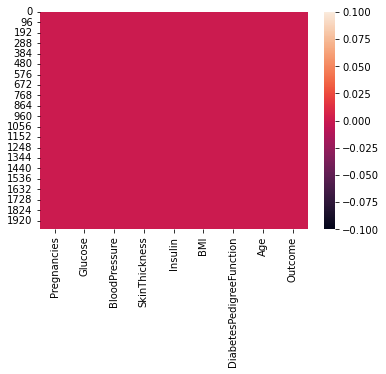

In [4]:
#Checking null values 
sb.heatmap(df.isnull())
plt.show()

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#no. of records(rows & columns) in dataset 
df.shape

(2000, 9)

In [7]:
#looking for duplicate values
df.duplicated().sum()

1256

In [8]:
#removing duplicated values
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#overall view of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [11]:
#statistical view of dataset 
df.describe().round(2).style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.750000,120.890000,68.960000,20.910000,79.530000,32.230000,0.470000,33.140000,0.340000
std,3.340000,31.940000,19.320000,16.310000,111.750000,8.210000,0.330000,11.750000,0.470000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.630000,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


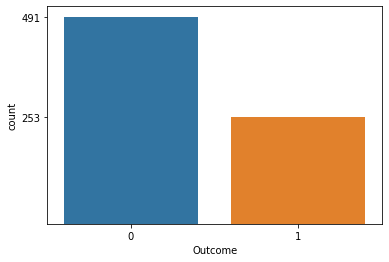

In [12]:
#checking dataset is balanced or not
sb.countplot(data=df,x='Outcome')
f= df['Outcome'].value_counts()
plt.yticks(f)
plt.show()

In [13]:
per = df[df['Outcome']==1].value_counts().sum()*100/df[df['Outcome']==0].value_counts().sum()
print(per.round(2),"%")

51.53 %


In [14]:
#here we can see it is just more than 50% so here we are considering data is balanced 

In [15]:
#selecting input and output 
X=df.drop('Outcome',axis=1)  #input
Y=df['Outcome']   #output 

In [16]:
#train test split 
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [18]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((520, 8), (224, 8), (520,), (224,))

In [19]:
#applying standard scaler on input to make value in one unit 
from sklearn.preprocessing import StandardScaler

In [20]:
#creating object of standardScaler class 
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [21]:
X_train

array([[ 1.62628812,  0.7466635 ,  0.96705091, ..., -0.23202162,
         0.92304681,  1.76483205],
       [-0.80118177, -1.56480967,  0.47297892, ...,  0.13489176,
        -0.15383619, -1.03654211],
       [ 1.32285439,  0.15317715,  0.96705091, ...,  0.8054576 ,
        -0.37908679,  1.41466028],
       ...,
       [ 2.84002307,  0.15317715,  1.06586531, ...,  1.4254147 ,
         0.34294938,  0.80185968],
       [ 0.10911944,  1.55880273,  0.17653572, ...,  1.45071907,
         0.02204441, -0.5988274 ],
       [ 1.62628812, -0.59648983,  0.37416452, ...,  0.09693521,
         0.5959706 ,  1.15203145]])

In [22]:
#creating function to train and test model and generating reports
def create_model(model):
    #training model with 70% data 
    model.fit(X_train,Y_train)
    
    #testing the model with 30% 
    Y_pred = model.predict(X_test)
    
    #generating report 
    print("Classification report")
    print(classification_report(Y_test,Y_pred))
    print("Confusion matrix")
    plot_confusion_matrix(model,X_test,Y_test)
    return model

In [23]:
from sklearn.metrics import classification_report,plot_confusion_matrix

# logistic Regression

In [24]:
#performing model using logistic regression algorithm 
from sklearn.linear_model import LogisticRegression

In [25]:
#creating object of Logistic regression class
lr=LogisticRegression()

Classification report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

Confusion matrix


LogisticRegression()

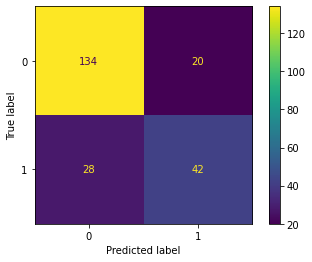

In [26]:
#calling the fucntion and passing the lr object
create_model(lr)

In [27]:
#in predicting diabetes recall is important so we will mainly focus of recall 

In [28]:
#recall and accuracy both are not good 

# Decision Tree Classifier

In [29]:
#performing Decision Tree Classifier algorithm to identify important input(features) to predict output 
from sklearn.tree import DecisionTreeClassifier

In [30]:
#creating object of decisionTreeClassifier class
dtc=DecisionTreeClassifier(random_state=1)

Classification report
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       154
           1       0.42      0.51      0.46        70

    accuracy                           0.63       224
   macro avg       0.59      0.60      0.59       224
weighted avg       0.65      0.63      0.64       224

Confusion matrix


DecisionTreeClassifier(random_state=1)

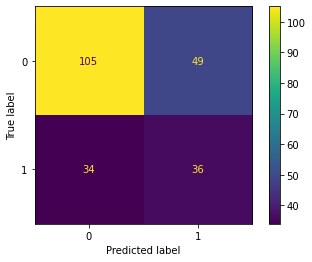

In [31]:
#calling the fucntion and passing dtc object
create_model(dtc)

In [32]:
#to see information gain of each input(feature)
ig = pd.DataFrame(dtc.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
ig.style.background_gradient()

,0
Glucose,0.302360
BMI,0.166217
DiabetesPedigreeFunction,0.165793
Age,0.142351
BloodPressure,0.077491
Pregnancies,0.069794
SkinThickness,0.045129
Insulin,0.030865


# Max Depth (Gini index)

In [33]:
#using pruning technique to reduct overfitting to make accuracy better 
'''
for i in range(8,0,-1):
    #creaing object of decisiontreeclassifier class with max_depth from 8 to 0 
    dtc1 = DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Number of max_Deth: ",i)
    #calling the function and passing object of dtc1
    dtc1=create_model(dtc1)
'''
    

'\nfor i in range(8,0,-1):\n    #creaing object of decisiontreeclassifier class with max_depth from 8 to 0 \n    dtc1 = DecisionTreeClassifier(random_state=1,max_depth=i)\n    print("Number of max_Deth: ",i)\n    #calling the function and passing object of dtc1\n    dtc1=create_model(dtc1)\n'

Classification report
              precision    recall  f1-score   support

           0       0.88      0.68      0.76       154
           1       0.53      0.80      0.64        70

    accuracy                           0.71       224
   macro avg       0.70      0.74      0.70       224
weighted avg       0.77      0.71      0.72       224

Confusion matrix


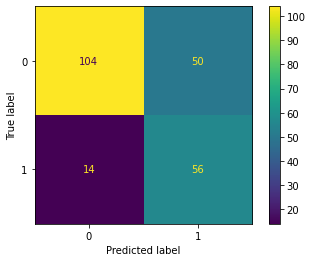

In [34]:
#we can take max_depth = 4 as recall and accuracy are good 
#creating object of dtc with max_depth = 4 
dtc1=DecisionTreeClassifier(random_state=1,max_depth=4)
#callling the function and passing the object of dtc1
dtc1=create_model(dtc1)

In [35]:
#checking inforation gain from each input
ig = pd.DataFrame(dtc1.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
ig.style.background_gradient()

,0
Glucose,0.565596
BMI,0.209823
Age,0.140294
DiabetesPedigreeFunction,0.064486
Insulin,0.019802
Pregnancies,0.000000
BloodPressure,0.000000
SkinThickness,0.000000


# Min_samples_leaf (Gini index)

In [36]:
#using 2nd pruning technique "Min_samples_leaf" 
'''
for i in range(45,101,1):
    #creating object of dtc with min_samples_leaf form 45 to 100 
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("Number of min_samples_leaf: ",i)
    
    #calling the function and passing dtc2 object
    dtc2=create_model(dtc2)
'''

'\nfor i in range(45,101,1):\n    #creating object of dtc with min_samples_leaf form 45 to 100 \n    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n    print("Number of min_samples_leaf: ",i)\n    \n    #calling the function and passing dtc2 object\n    dtc2=create_model(dtc2)\n'

Classification report
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224

Confusion matrix


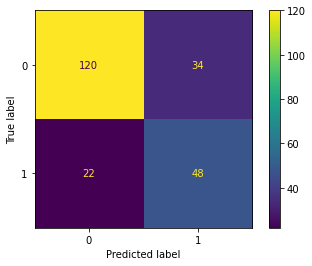

In [37]:
#creating object of dtc class with min_samples_leaf = 46 as it has better recall and accuracy then rest
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf = 46)
#calling the function and passing dtc2 object 
dtc2 = create_model(dtc2)

In [38]:
#checking information gain from each input
ig = pd.DataFrame(dtc2.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
ig.style.background_gradient()

,0
Glucose,0.678041
Age,0.176418
BMI,0.133825
DiabetesPedigreeFunction,0.011716
Pregnancies,0.000000
BloodPressure,0.000000
SkinThickness,0.000000
Insulin,0.000000


# DecisionTreeClassifier (Entropy method)

Classification report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accuracy                           0.74       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.73      0.74      0.73       224

Confusion matrix


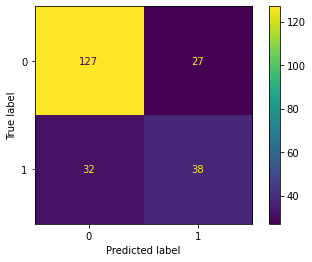

In [39]:
#Performing model with DecisionTreeClassifier (Entropy method) 
dtce = DecisionTreeClassifier(random_state=1,criterion='entropy')
#calling the function and passing object of dtce
dtce=create_model(dtce)

In [40]:
#checking information gain from each input(features)
ig = pd.DataFrame(dtce.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
ig.style.background_gradient()

,0
Glucose,0.236065
BMI,0.165551
Age,0.160368
DiabetesPedigreeFunction,0.133861
SkinThickness,0.127734
BloodPressure,0.095186
Pregnancies,0.041324
Insulin,0.039911


# Max_depth (Entropy method)

Number of max_depth:  8
Classification report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       154
           1       0.60      0.53      0.56        70

    accuracy                           0.74       224
   macro avg       0.70      0.68      0.69       224
weighted avg       0.73      0.74      0.74       224

Confusion matrix
Number of max_depth:  7
Classification report
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       154
           1       0.52      0.66      0.58        70

    accuracy                           0.71       224
   macro avg       0.67      0.69      0.68       224
weighted avg       0.73      0.71      0.71       224

Confusion matrix
Number of max_depth:  6
Classification report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accura

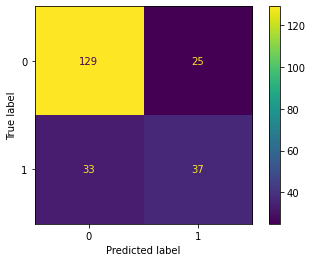

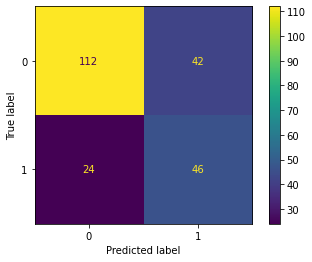

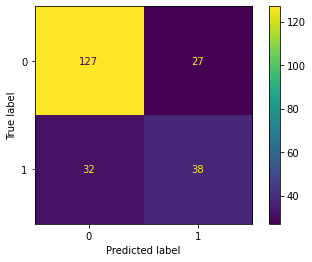

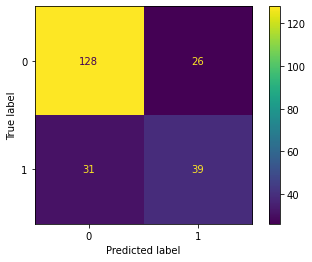

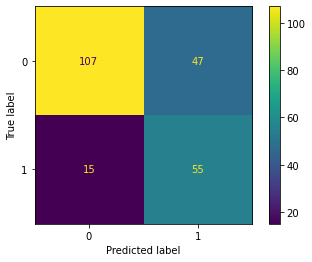

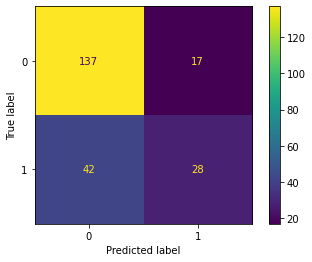

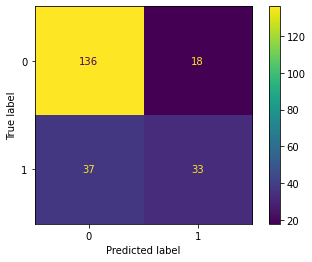

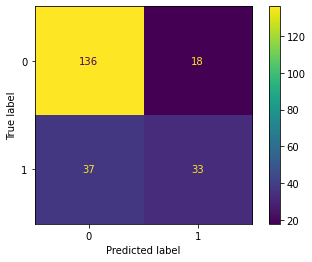

In [41]:
#using purining technique with entropy method
'''
for i in range(8,0,-1):
    #creating object of dtc with max_depth from 8 to 0 
    dtce_1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print("Number of max_depth: ",i)
    #calling the function and passing object dtce_1
    dtce_1 = create_model(dtce_1)
    dtce_1
'''

Classification report
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       154
           1       0.54      0.79      0.64        70

    accuracy                           0.72       224
   macro avg       0.71      0.74      0.71       224
weighted avg       0.77      0.72      0.73       224

Confusion matrix


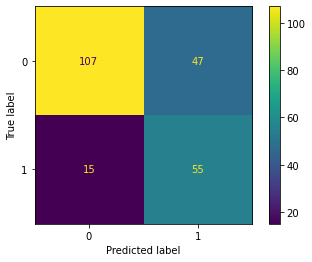

In [42]:
#here recall and accuracy is good in max_depth=4
dtce_1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
#calling the function and passing object of dtce_1
dtce_1 = create_model(dtce_1)

In [43]:
#checking information gain from each input 
ig = pd.DataFrame(dtce_1.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
ig.style.background_gradient()

,0
Glucose,0.515251
BMI,0.261316
Age,0.092256
Insulin,0.044242
DiabetesPedigreeFunction,0.031642
SkinThickness,0.031006
Pregnancies,0.024288
BloodPressure,0.000000


# Min_samples_leaf (Entropy method)

Number of min_samples_leaf:  45
Classification report
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       154
           1       0.61      0.63      0.62        70

    accuracy                           0.76       224
   macro avg       0.72      0.72      0.72       224
weighted avg       0.76      0.76      0.76       224

Confusion matrix
Number of min_samples_leaf:  46
Classification report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       154
           1       0.60      0.69      0.64        70

    accuracy                           0.76       224
   macro avg       0.72      0.74      0.73       224
weighted avg       0.77      0.76      0.76       224

Confusion matrix
Number of min_samples_leaf:  47
Classification report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       154
           1       0.60      0.69      0.

Number of min_samples_leaf:  66
Classification report
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       154
           1       0.55      0.81      0.66        70

    accuracy                           0.73       224
   macro avg       0.72      0.75      0.72       224
weighted avg       0.78      0.73      0.74       224

Confusion matrix
Number of min_samples_leaf:  67
Classification report
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       154
           1       0.55      0.81      0.66        70

    accuracy                           0.73       224
   macro avg       0.72      0.75      0.72       224
weighted avg       0.78      0.73      0.74       224

Confusion matrix
Number of min_samples_leaf:  68
Classification report
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       154
           1       0.55      0.81      0.

Number of min_samples_leaf:  87
Classification report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       154
           1       0.58      0.80      0.67        70

    accuracy                           0.75       224
   macro avg       0.73      0.77      0.74       224
weighted avg       0.79      0.75      0.76       224

Confusion matrix
Number of min_samples_leaf:  88
Classification report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       154
           1       0.58      0.80      0.67        70

    accuracy                           0.75       224
   macro avg       0.73      0.77      0.74       224
weighted avg       0.79      0.75      0.76       224

Confusion matrix
Number of min_samples_leaf:  89
Classification report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       154
           1       0.58      0.80      0.

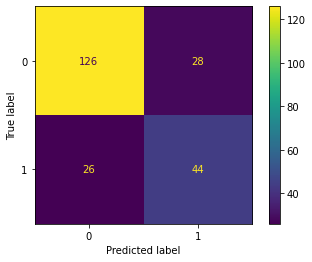

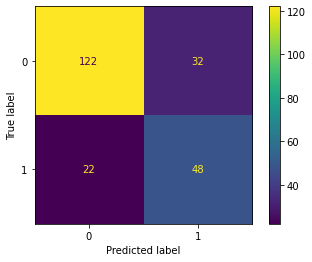

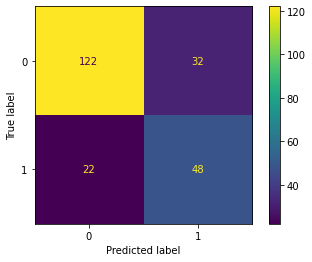

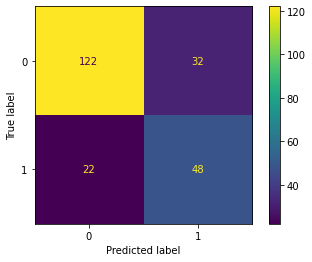

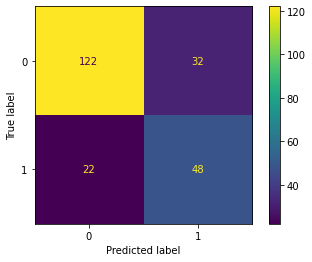

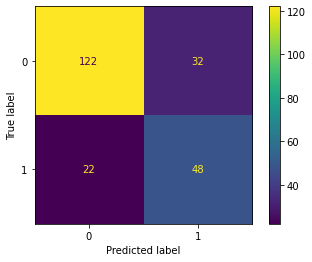

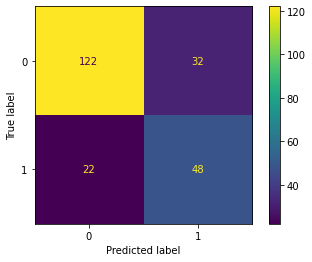

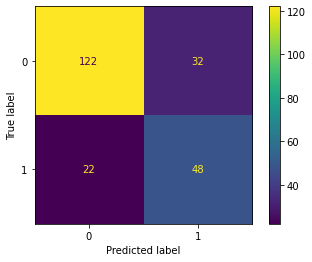

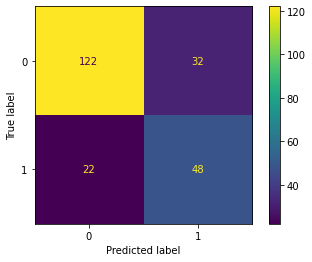

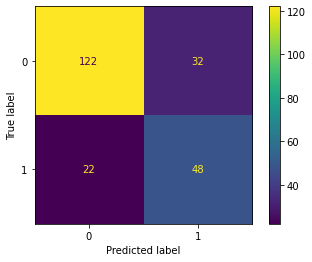

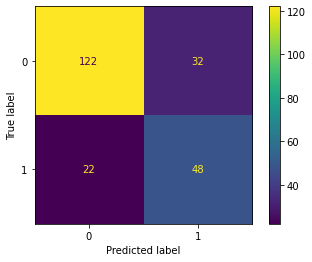

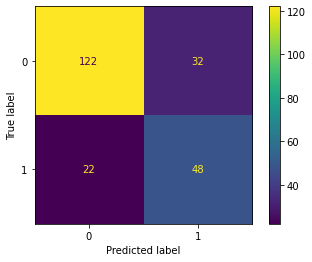

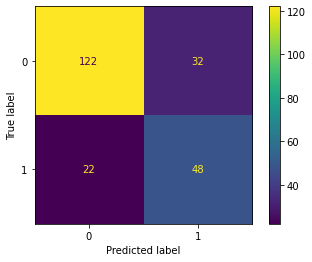

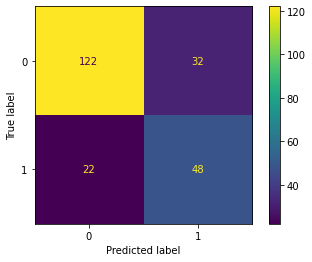

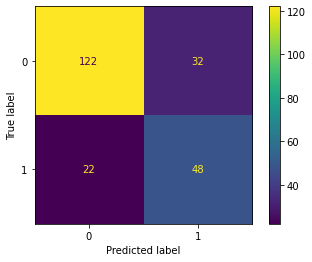

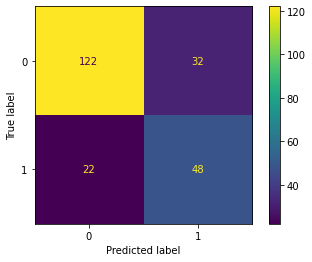

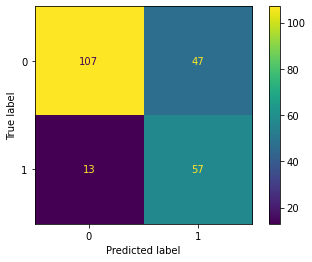

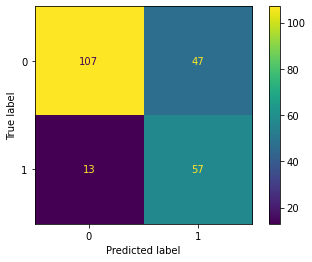

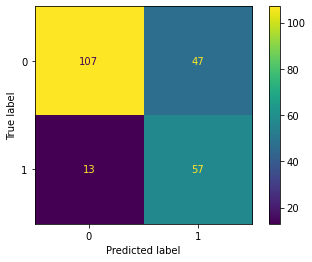

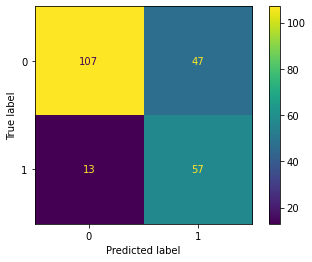

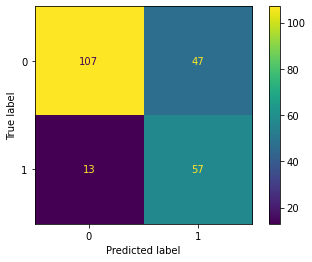

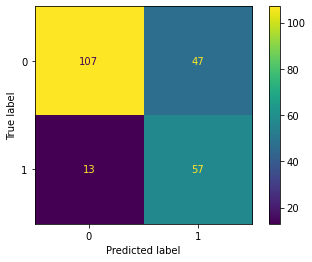

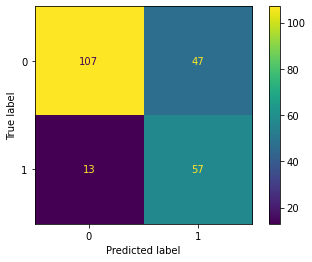

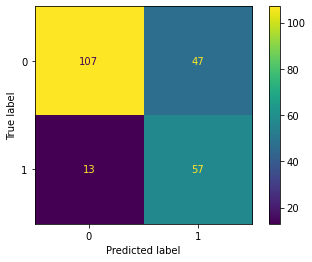

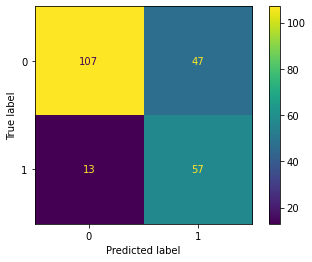

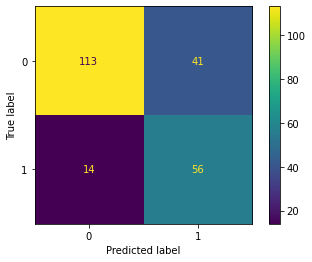

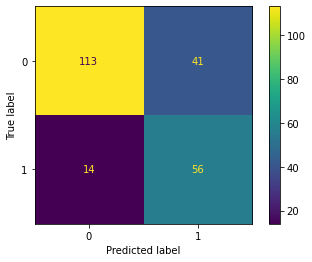

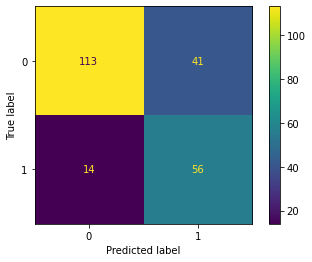

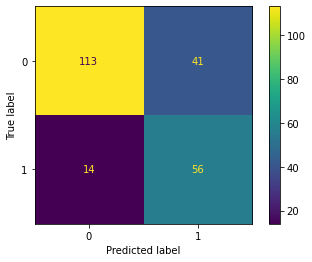

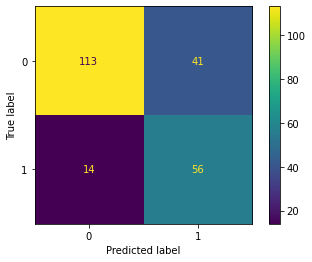

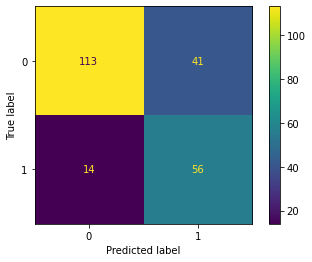

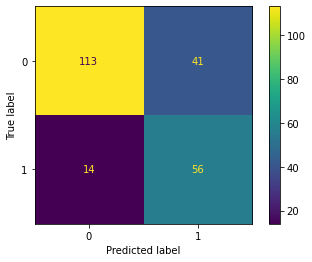

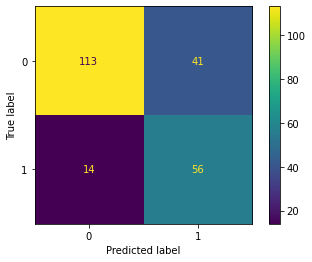

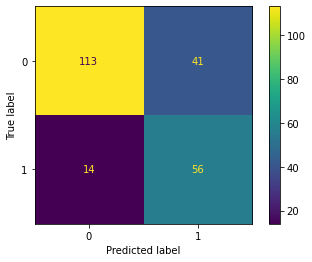

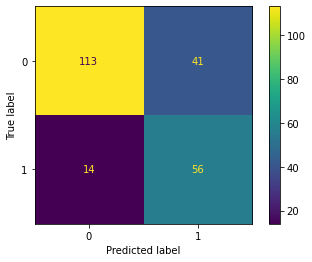

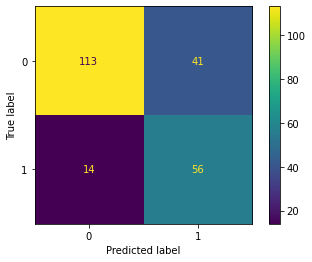

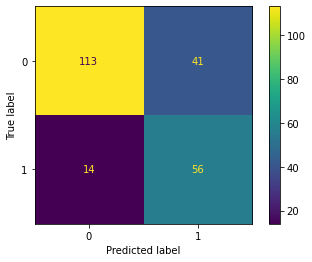

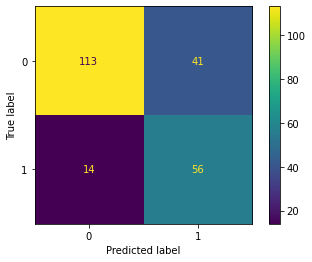

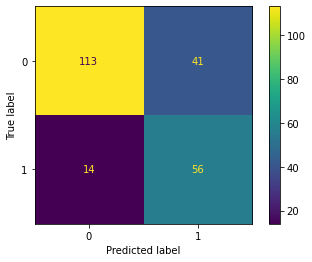

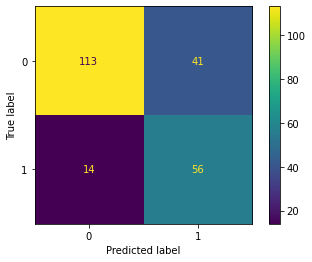

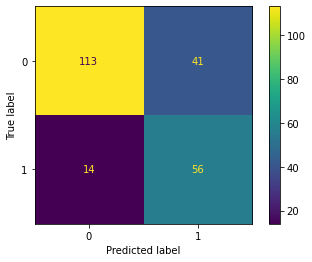

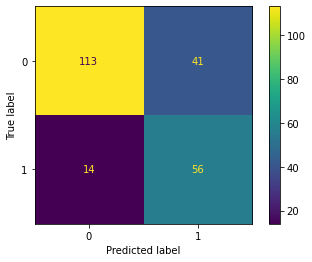

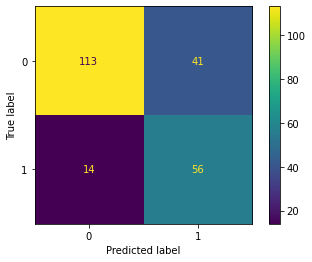

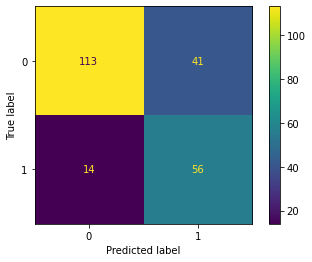

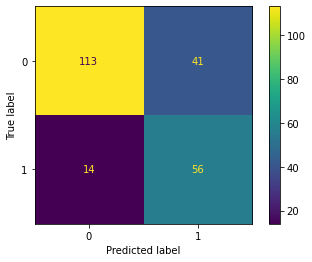

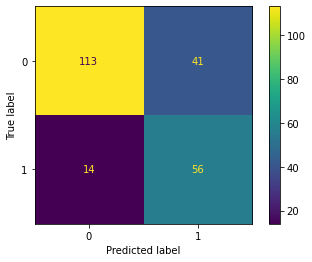

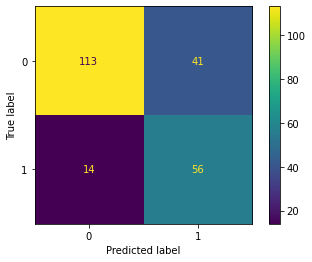

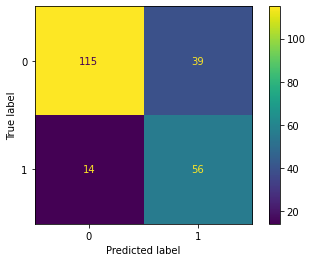

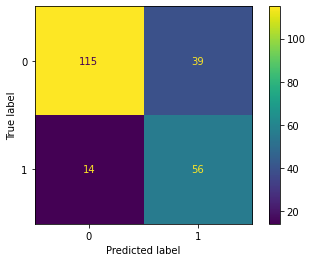

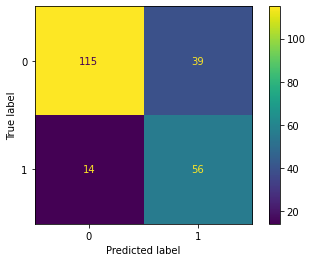

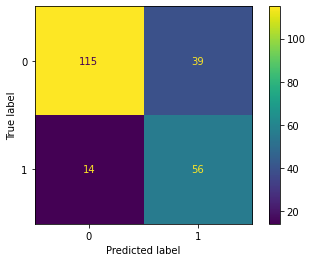

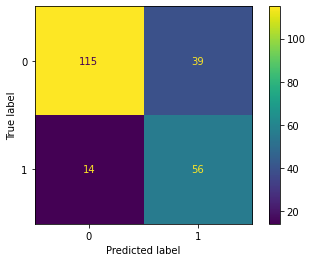

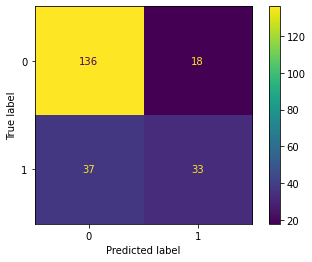

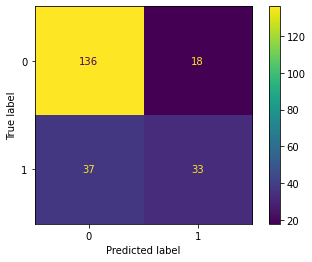

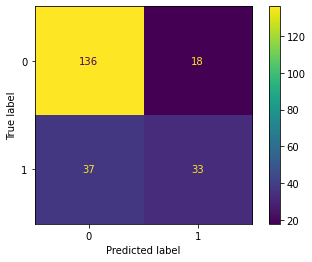

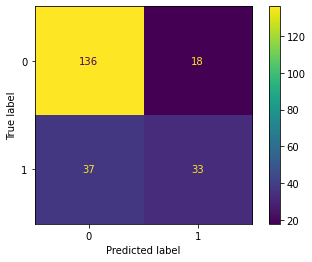

In [44]:
#using 2nd pruning technique min_samples_leaf 
'''
for i in range(45,101,1):
    #creating object of dtc with min_samples_leaf
    dtce_2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    print("Number of min_samples_leaf: ",i)
    
    #calling the function and passing the object dtce_2
    dtce_2 = create_model(dtce_2)
'''

Classification report
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       154
           1       0.59      0.80      0.68        70

    accuracy                           0.76       224
   macro avg       0.74      0.77      0.75       224
weighted avg       0.80      0.76      0.77       224

Confusion matrix


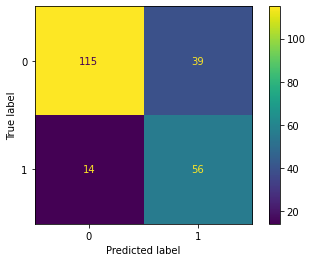

In [45]:
#here we can see min_samples_leaf = 92 has good recall and accuracy 
#creating objetc of dtc with min_samples_leaf = 92 
dtce_2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=92)
#calling the function and passing the object of dtce_2
dtce_2 = create_model(dtce_2)

In [46]:
#checking information gain from each input(features) 
ig = pd.DataFrame(dtce_2.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
ig.style.background_gradient()

,0
Glucose,0.647576
BMI,0.267865
Age,0.084559
Pregnancies,0.000000
BloodPressure,0.000000
SkinThickness,0.000000
Insulin,0.000000
DiabetesPedigreeFunction,0.000000


In [47]:
'''
In Decision Tree Classifier Algorithm 
We get best accuracy and Recall in DecisionTreeClassifier using min_sampels_leaf - Entropy method 
where min_samples_leaf = 92 
recall of 0=75, 1=80
accuracy = 76
'''

'\nIn Decision Tree Classifier Algorithm \nWe get best accuracy and Recall in DecisionTreeClassifier using min_sampels_leaf - Entropy method \nwhere min_samples_leaf = 92 \nrecall of 0=75, 1=80\naccuracy = 76\n'

# Ensambling Technique (Random Forest Tree)

In [49]:
#performing model with Random Forest tree using "Gini index" 
from sklearn.ensemble import RandomForestClassifier 

Max_features:  8
Classification report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       154
           1       0.64      0.54      0.59        70

    accuracy                           0.76       224
   macro avg       0.73      0.70      0.71       224
weighted avg       0.76      0.76      0.76       224

Confusion matrix
Max_features:  7
Classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224

Confusion matrix
Max_features:  6
Classification report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       154
           1       0.61      0.49      0.54        70

    accuracy                   

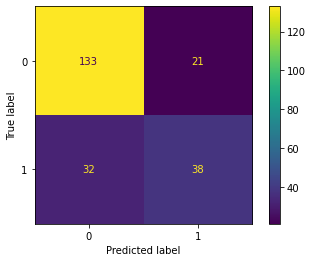

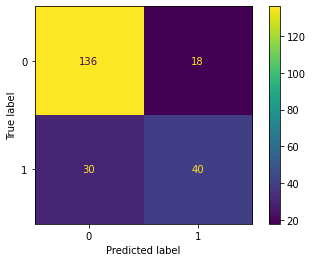

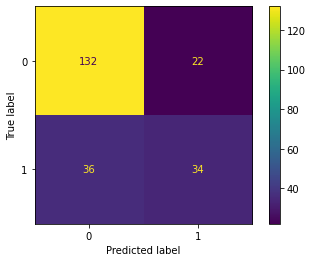

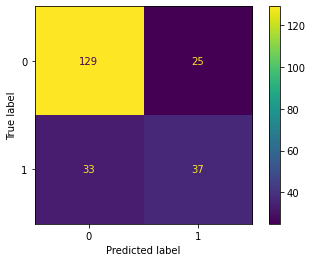

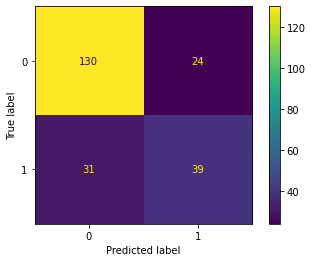

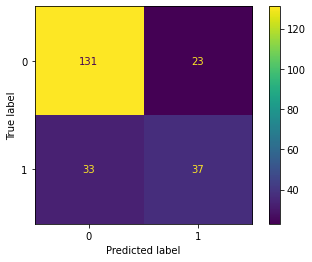

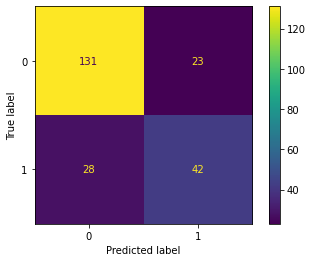

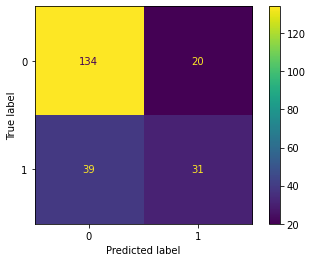

In [50]:
'''
for i in range(8,0,-1):
    #creaitng object of random forest classifier using gini index
    rfc = RandomForestClassifier(random_state=1,n_estimators=10,max_features=i)
    print("Max_features: ",i)
    
    #calling the function and passing the object of rfc
    rfc = create_model(rfc)
'''

Classification report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       154
           1       0.62      0.64      0.63        70

    accuracy                           0.77       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix


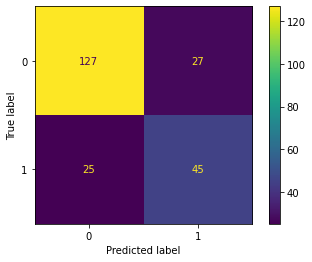

In [59]:
#here we can see recall and acuracy of max_features = 2 is good 
#creaing object of rfc with max_features = 2 , n_estimators = 9
rfc = RandomForestClassifier(random_state=1,n_estimators=9,max_features=2)
#calling the function and passing the object 
rfc = create_model(rfc)

Max_features:  8
Classification report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.65      0.64      0.65        70

    accuracy                           0.78       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.78      0.78       224

Confusion matrix
Max_features:  7
Classification report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       154
           1       0.61      0.66      0.63        70

    accuracy                           0.76       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.77      0.76      0.77       224

Confusion matrix
Max_features:  6
Classification report
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       154
           1       0.61      0.67      0.64        70

    accuracy                   

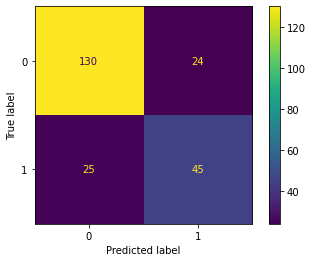

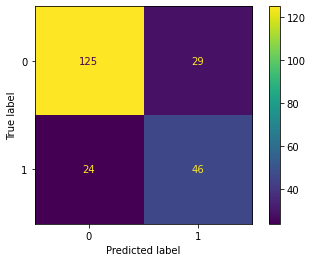

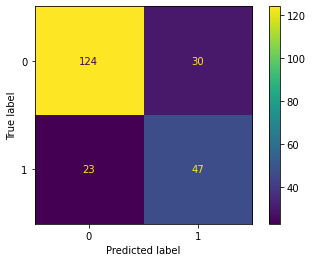

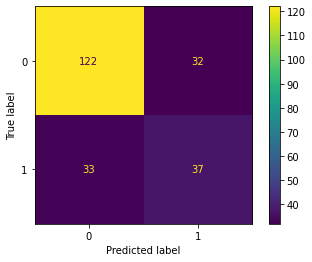

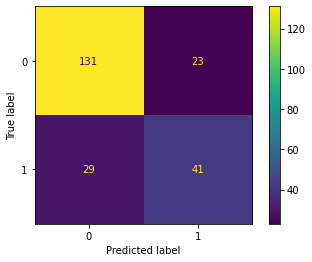

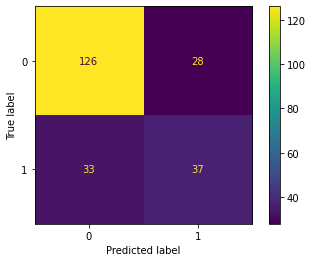

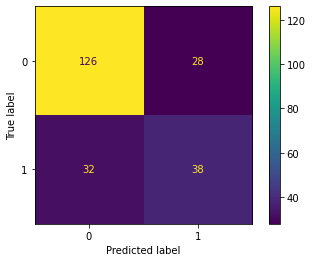

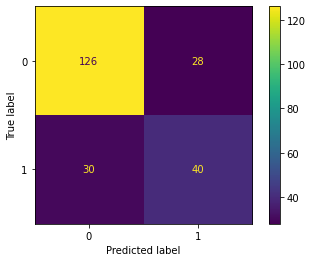

In [64]:
#peforming model with random forest classifier using "Entropy Method"
'''
for i in range(8,0,-1):
    #creating object of random forest classifier using Enrtopy method 
    rfc_e = RandomForestClassifier(random_state=1,n_estimators=9,max_features=i,criterion='entropy')
    print("Max_features: ",i)
    
    #calling the function and passing the object 
    rfc_e = create_model(rfc_e)
'''

Classification report
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       154
           1       0.61      0.67      0.64        70

    accuracy                           0.76       224
   macro avg       0.73      0.74      0.73       224
weighted avg       0.77      0.76      0.77       224

Confusion matrix


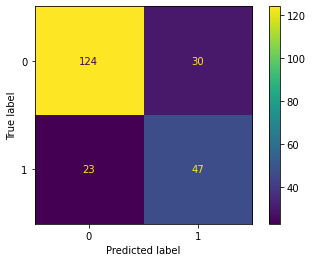

In [65]:
#creaing object of rfc with max_features = 6
rfc_e = RandomForestClassifier(random_state=1,n_estimators=9,max_features=6,criterion='entropy')
#calling the function and passing the object of rfc_e
rfc_e = create_model(rfc_e)

In [ ]:
'''
In Ensembling technique :
using Random forest classifier (Gini index)
    max_features = 2
    recall of 0=82, 1=64
    accuracy = 77
using Random forest classifier (Entropy method)
    max_faetures = 6
    recall of 0=81, 1=67
    accuracy = 76
'''

# Ada Boosting (Adaptor boosting)

In [66]:
#performing model with Ada Boosting (adaptor boosting) 
from sklearn.ensemble import AdaBoostClassifier

No. of stumps:  8
Classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       154
           1       0.62      0.54      0.58        70

    accuracy                           0.75       224
   macro avg       0.71      0.70      0.70       224
weighted avg       0.75      0.75      0.75       224

Confusion matrix
No. of stumps:  7
Classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       154
           1       0.62      0.53      0.57        70

    accuracy                           0.75       224
   macro avg       0.71      0.69      0.70       224
weighted avg       0.74      0.75      0.74       224

Confusion matrix
No. of stumps:  6
Classification report
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       154
           1       0.62      0.53      0.57        70

    accuracy                

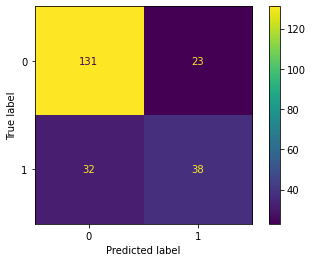

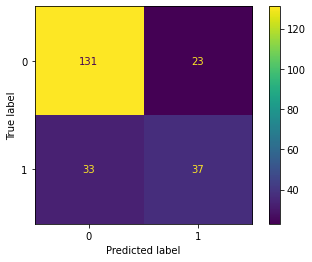

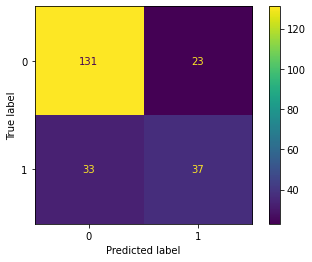

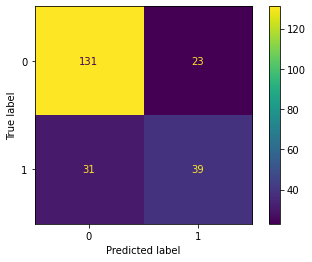

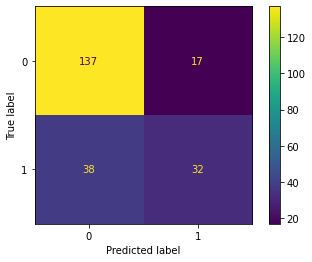

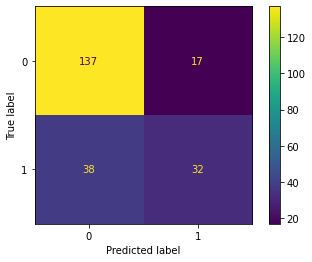

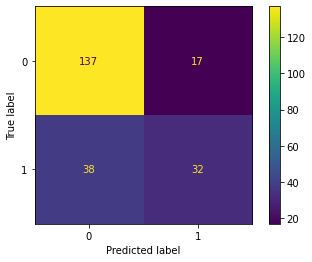

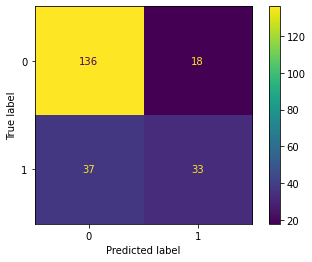

In [67]:
'''
for i in range(8,0,-1):
    #creating object of AdaBoostClassifier class
    ada = AdaBoostClassifier(random_state=1,n_estimators=i)
    print("No. of stumps: ",i)
    
    #calling the function and passing the object 
    ada = create_model(ada)
'''

Classification report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       154
           1       0.63      0.56      0.59        70

    accuracy                           0.76       224
   macro avg       0.72      0.70      0.71       224
weighted avg       0.75      0.76      0.75       224

Confusion matrix


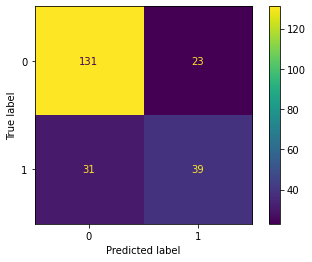

In [68]:
#crerting object of AdaBoostclassifier with n_estimators = 5
ada = AdaBoostClassifier(random_state=1,n_estimators=5)
#calling the function and passing the object of ada 
ada = create_model(ada)

# Gradient Boosting

In [69]:
#performing model with Gradient Boosting Algorithm 
from sklearn.ensemble import GradientBoostingClassifier

no. of Estimators:  10
Classification report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.65      0.46      0.54        70

    accuracy                           0.75       224
   macro avg       0.72      0.67      0.69       224
weighted avg       0.74      0.75      0.74       224

Confusion matrix
no. of Estimators:  11
Classification report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.65      0.49      0.56        70

    accuracy                           0.76       224
   macro avg       0.72      0.68      0.70       224
weighted avg       0.75      0.76      0.75       224

Confusion matrix
no. of Estimators:  12
Classification report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.62      0.47      0.54        70

    accuracy 

no. of Estimators:  32
Classification report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       154
           1       0.60      0.57      0.58        70

    accuracy                           0.75       224
   macro avg       0.70      0.70      0.70       224
weighted avg       0.74      0.75      0.74       224

Confusion matrix
no. of Estimators:  33
Classification report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       154
           1       0.60      0.57      0.58        70

    accuracy                           0.75       224
   macro avg       0.70      0.70      0.70       224
weighted avg       0.74      0.75      0.74       224

Confusion matrix
no. of Estimators:  34
Classification report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       154
           1       0.61      0.57      0.59        70

    accuracy 

no. of Estimators:  54
Classification report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       154
           1       0.62      0.61      0.62        70

    accuracy                           0.76       224
   macro avg       0.72      0.72      0.72       224
weighted avg       0.76      0.76      0.76       224

Confusion matrix
no. of Estimators:  55
Classification report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       154
           1       0.62      0.61      0.62        70

    accuracy                           0.76       224
   macro avg       0.72      0.72      0.72       224
weighted avg       0.76      0.76      0.76       224

Confusion matrix
no. of Estimators:  56
Classification report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       154
           1       0.63      0.63      0.63        70

    accuracy 

no. of Estimators:  76
Classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       154
           1       0.64      0.63      0.63        70

    accuracy                           0.77       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix
no. of Estimators:  77
Classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       154
           1       0.64      0.63      0.63        70

    accuracy                           0.77       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix
no. of Estimators:  78
Classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       154
           1       0.64      0.63      0.63        70

    accuracy 

no. of Estimators:  98
Classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       154
           1       0.64      0.63      0.63        70

    accuracy                           0.77       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix
no. of Estimators:  99
Classification report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       154
           1       0.64      0.63      0.63        70

    accuracy                           0.77       224
   macro avg       0.73      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix
no. of Estimators:  100
Classification report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.64      0.64      0.64        70

    accuracy

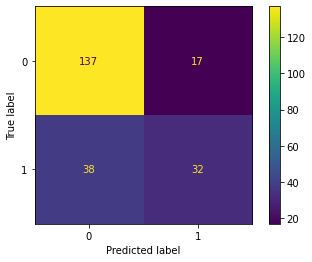

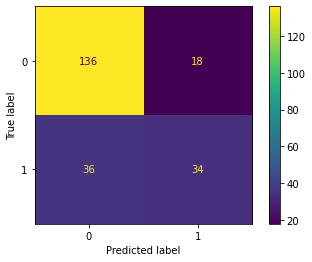

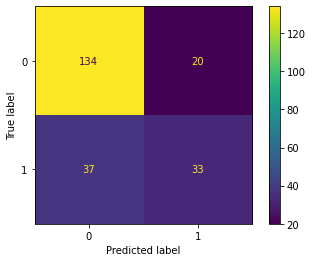

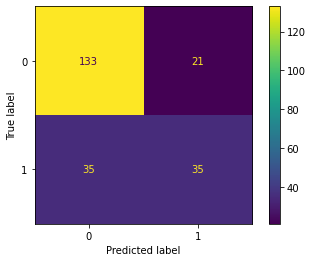

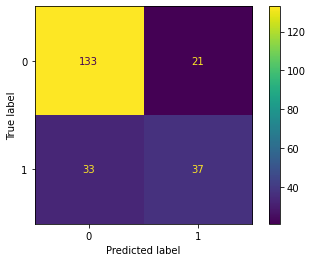

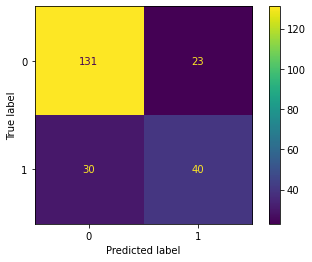

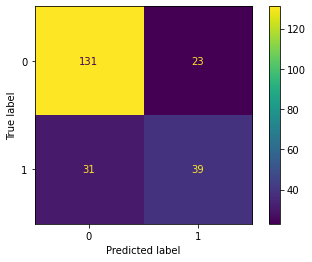

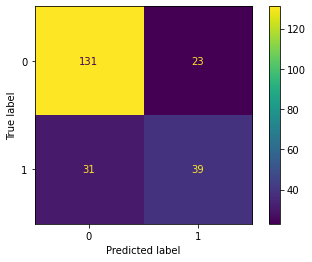

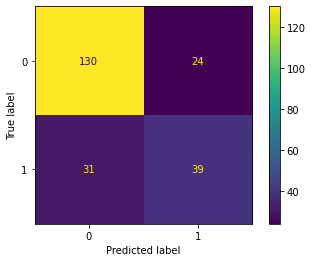

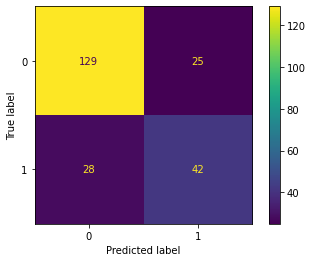

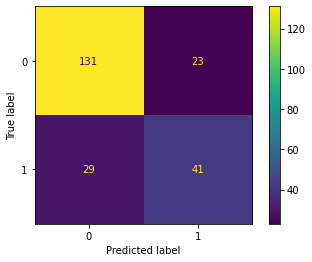

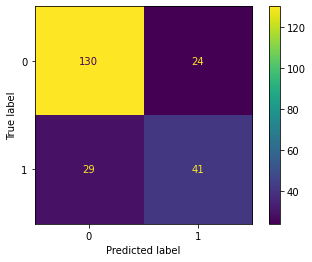

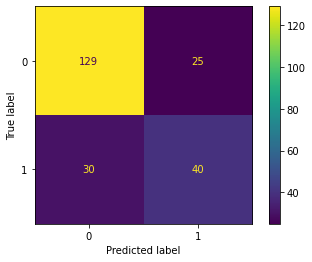

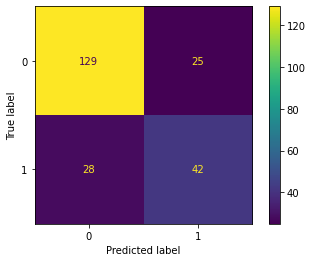

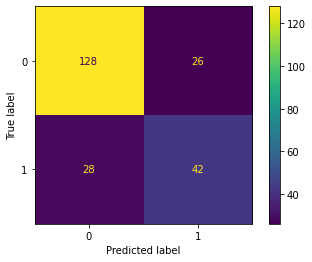

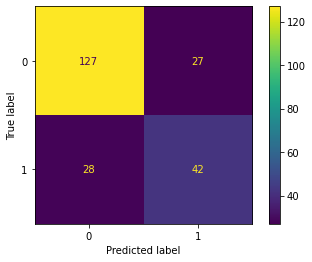

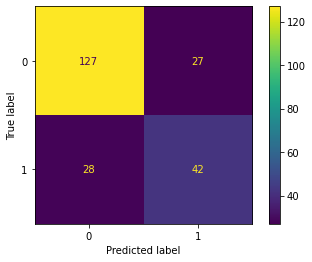

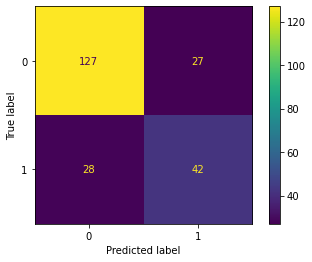

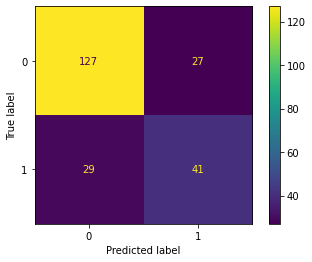

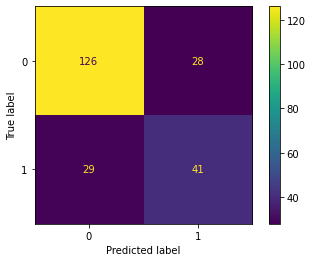

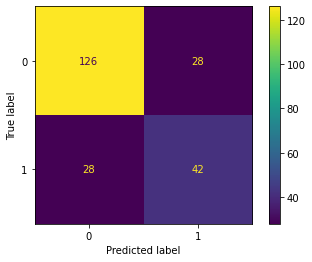

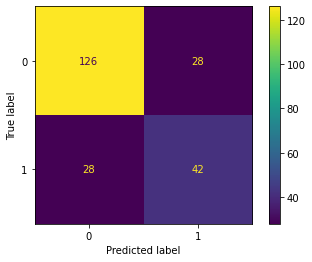

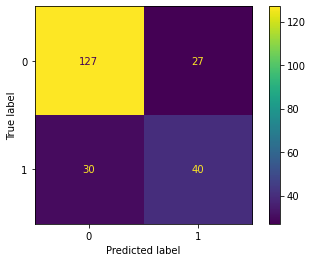

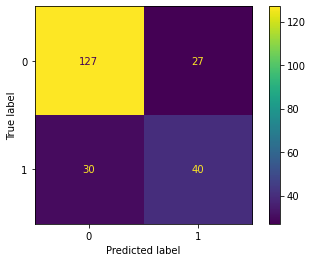

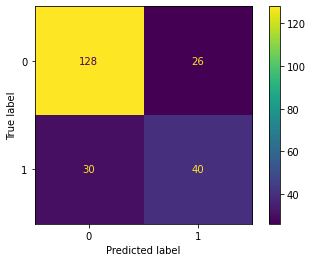

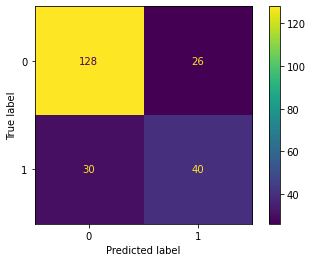

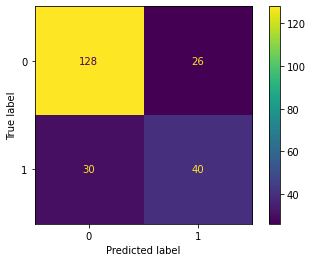

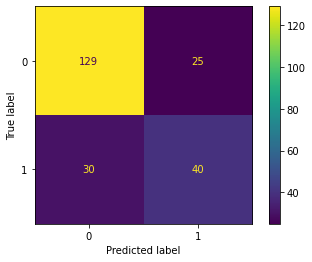

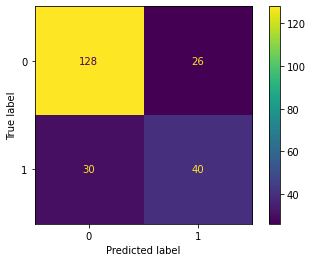

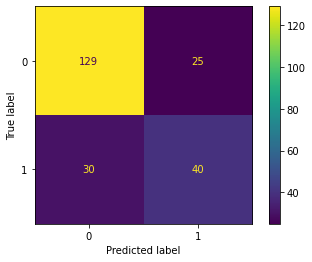

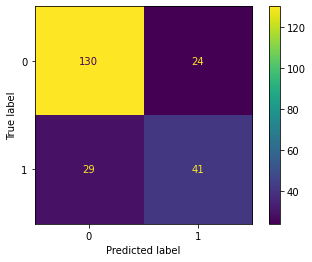

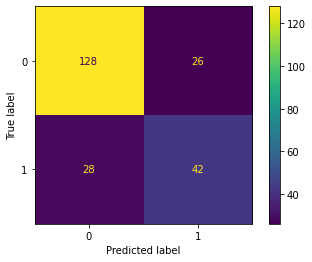

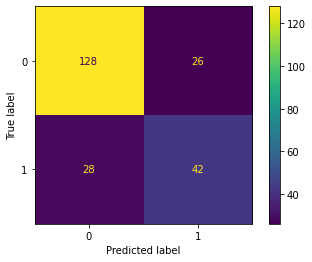

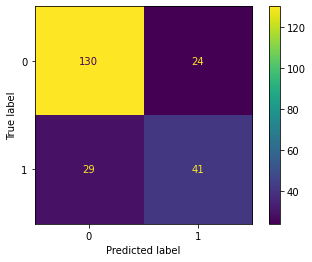

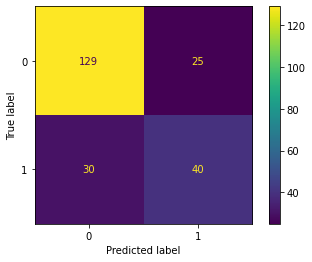

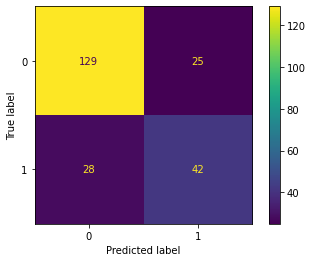

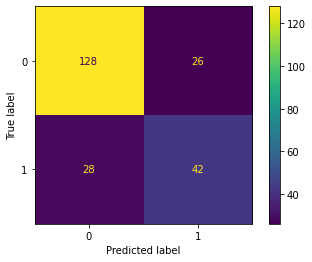

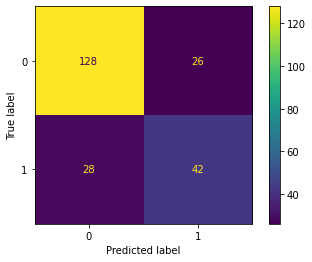

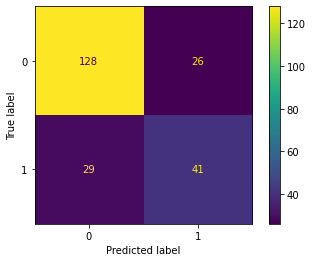

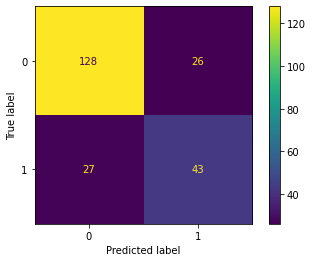

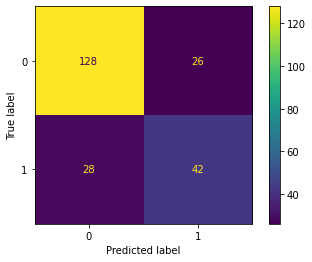

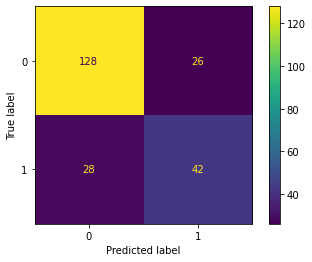

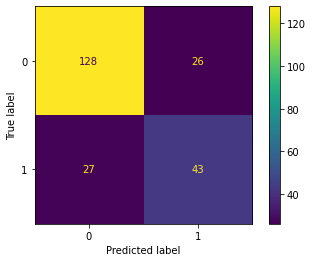

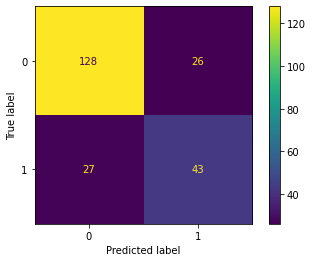

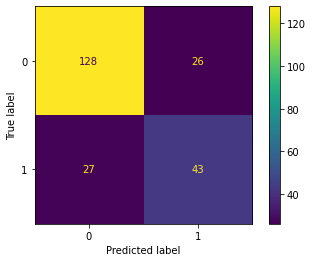

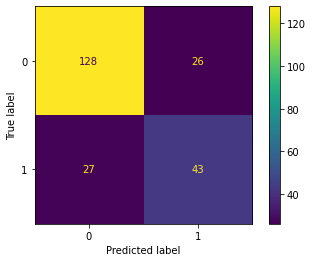

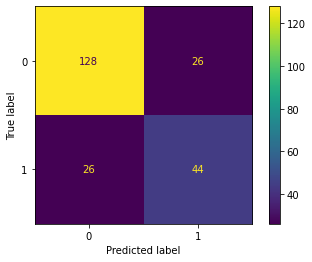

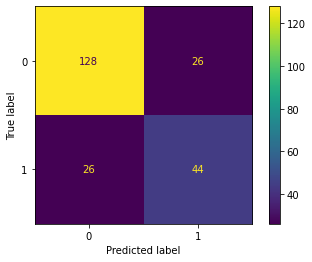

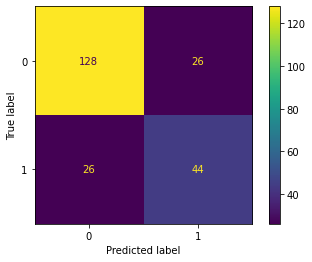

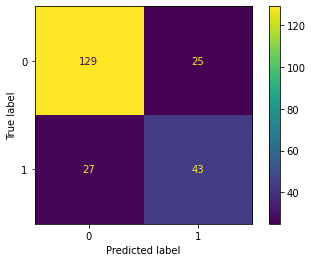

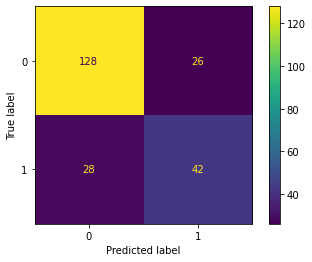

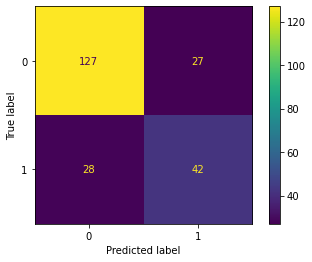

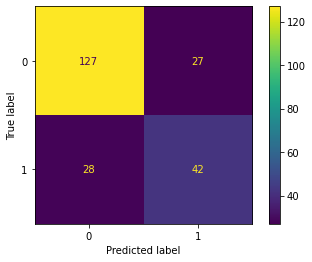

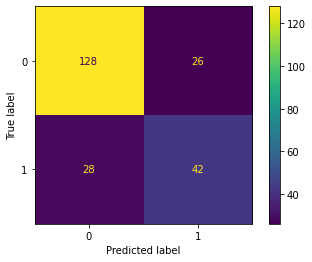

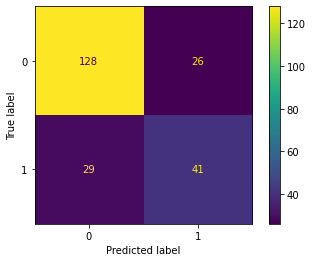

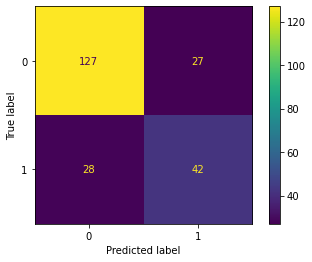

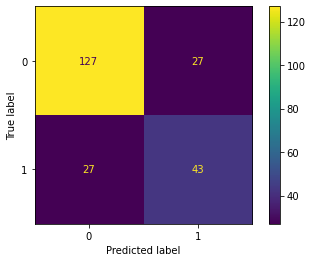

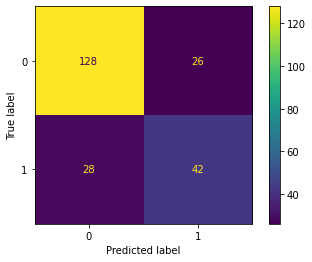

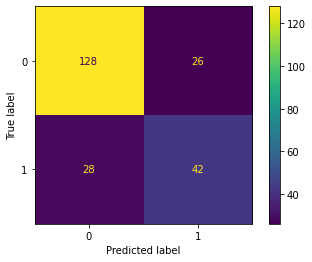

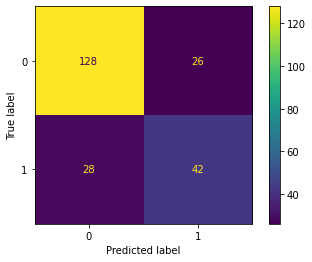

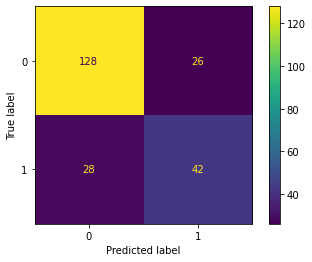

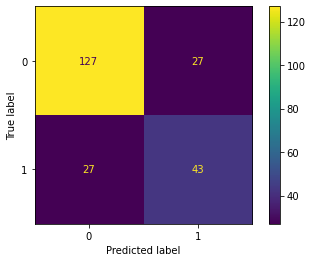

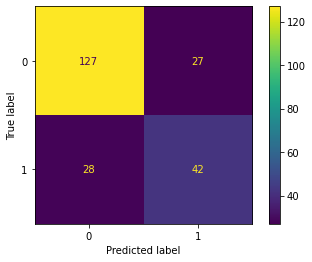

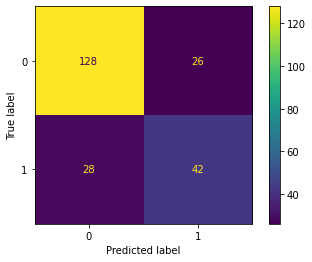

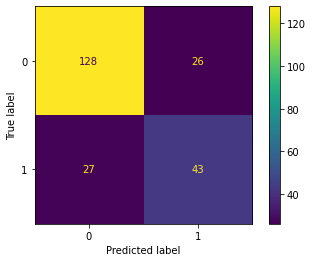

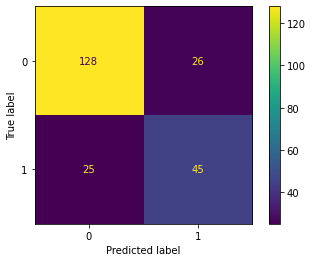

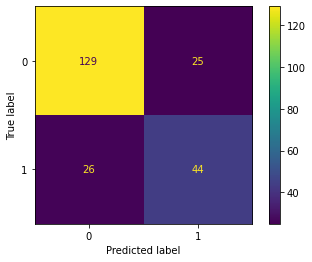

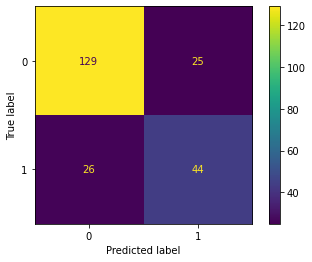

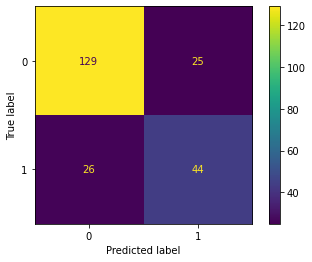

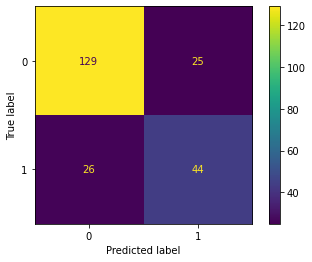

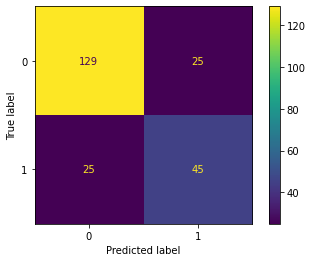

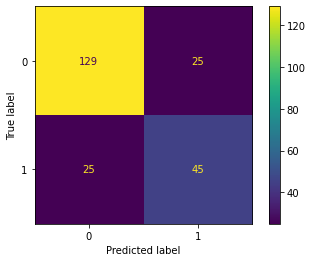

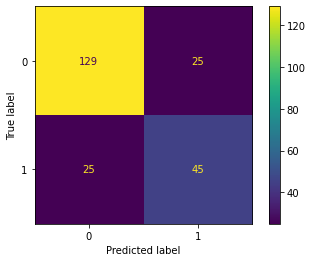

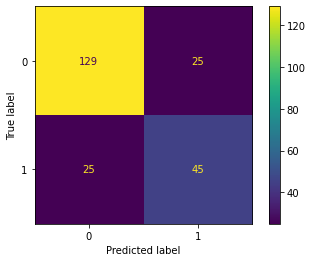

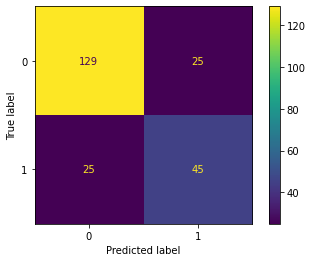

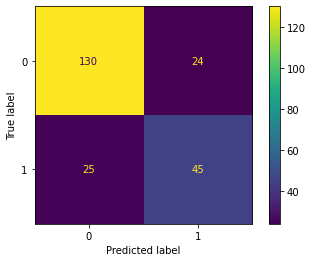

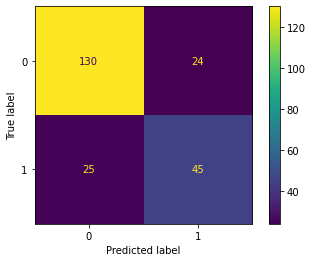

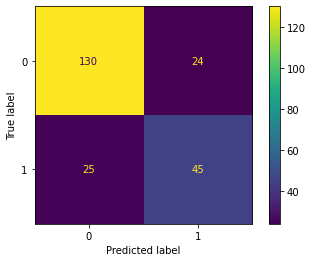

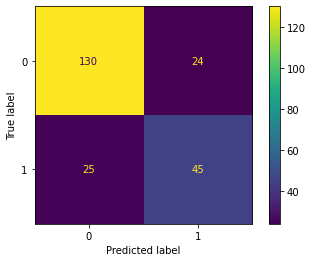

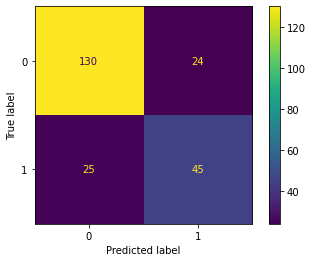

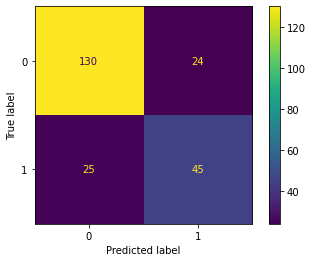

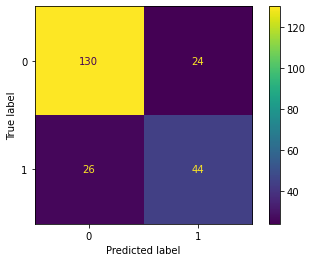

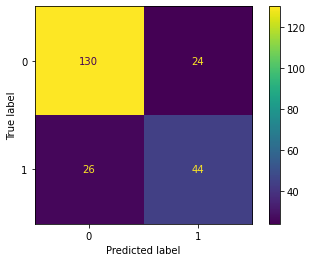

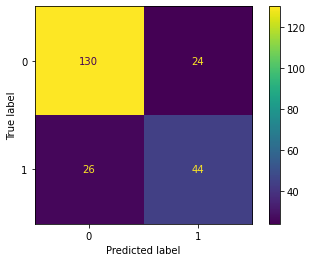

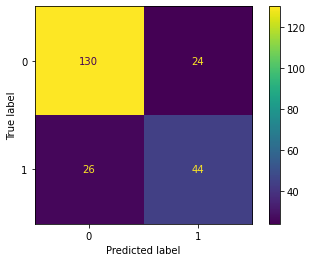

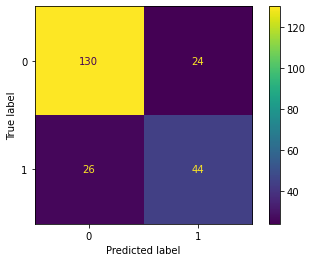

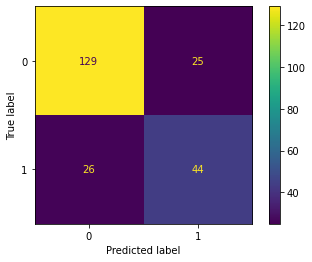

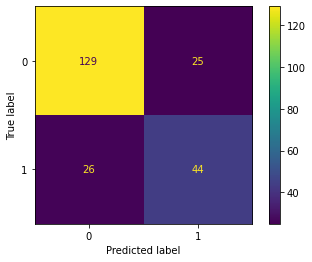

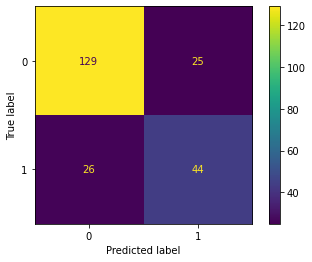

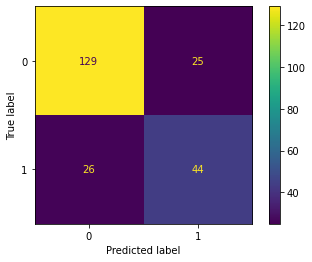

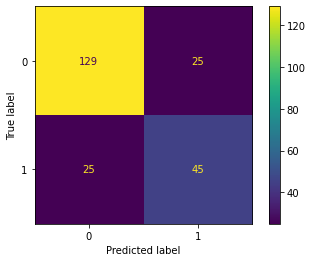

In [70]:
for i in range(10,101):
    #creating object of GradientBoostingClassifier class with n_estimator from 10 to 100
    gbc = GradientBoostingClassifier(random_state=1,n_estimators=i)
    print("no. of Estimators: ",i)
    
    #calling the function and passing the object 
    gbc = create_model(gbc)

Classification report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.64      0.64      0.64        70

    accuracy                           0.78       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.78      0.78      0.78       224

Confusion matrix


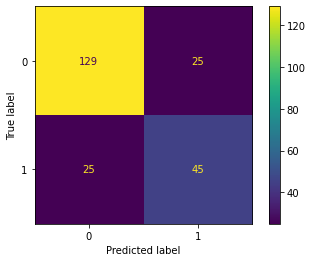

In [72]:
#creating object of gradient boosting classifier with n_estimators = 80 
gbc = GradientBoostingClassifier(random_state=1,n_estimators=80)
#calling the function and passing the object gbc
gbc = create_model(gbc)

# Extreme Gradient Boosting

In [73]:
#performing model with Extreme Gradient Boosting 
from xgboost import XGBClassifier

No. of estimators:  10
Classification report
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       154
           1       0.63      0.64      0.64        70

    accuracy                           0.77       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix
No. of estimators:  11
Classification report
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       154
           1       0.63      0.64      0.64        70

    accuracy                           0.77       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.77      0.77      0.77       224

Confusion matrix
No. of estimators:  12
Classification report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.64      0.64      0.64        70

    accuracy 

No. of estimators:  32
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  33
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  34
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy 

No. of estimators:  54
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  55
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  56
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy 

No. of estimators:  76
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  77
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  78
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy 

No. of estimators:  98
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  99
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix
No. of estimators:  100
Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy

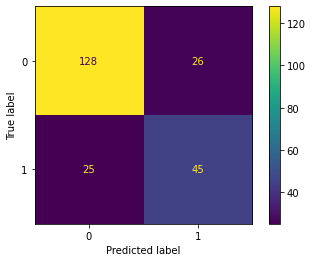

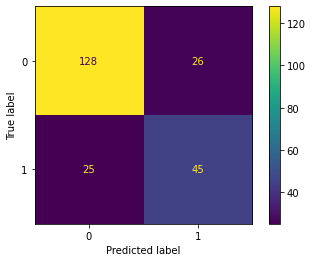

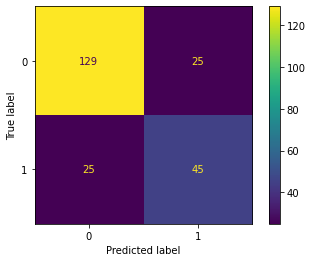

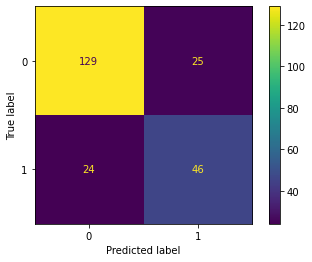

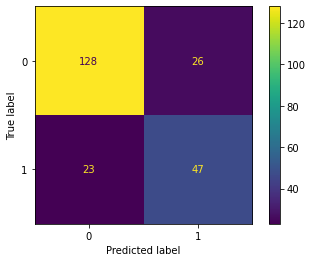

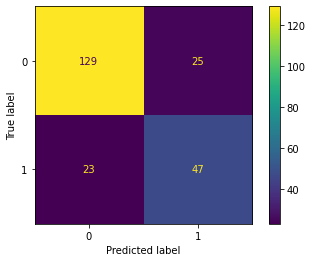

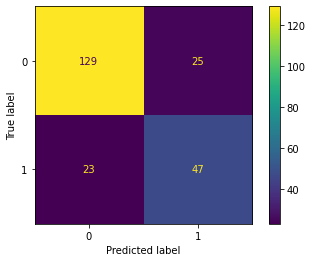

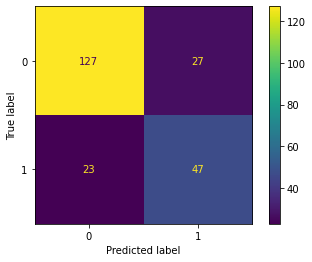

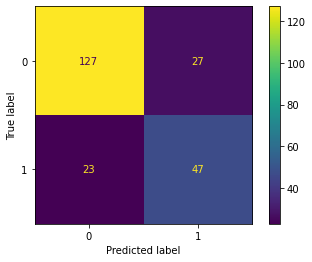

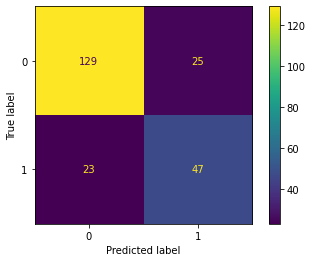

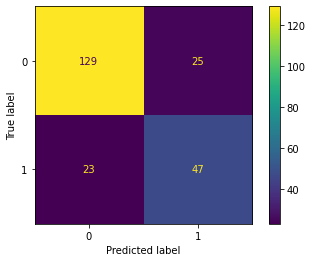

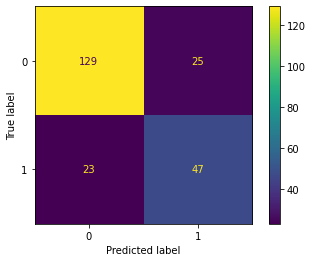

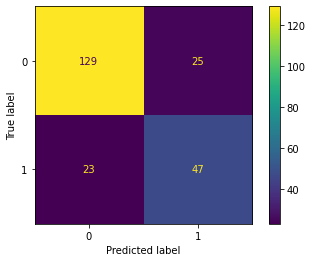

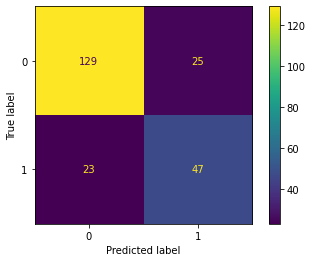

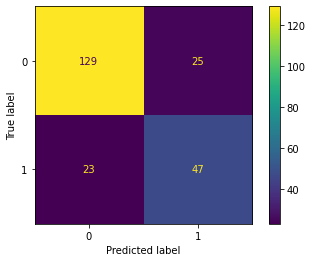

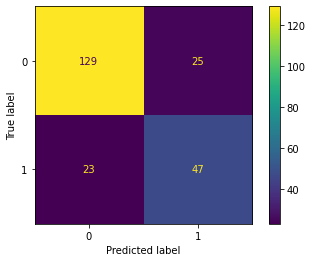

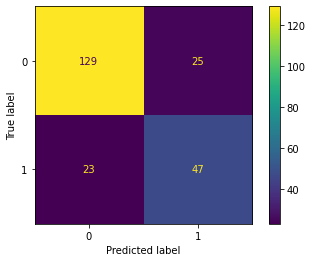

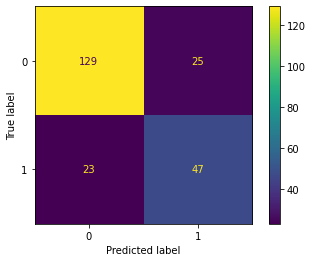

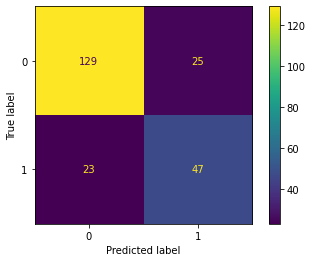

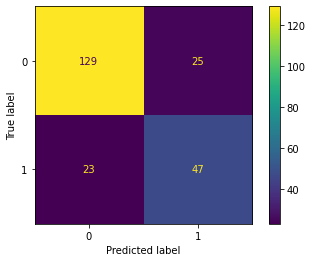

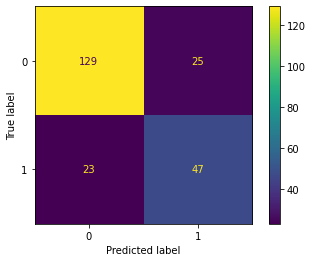

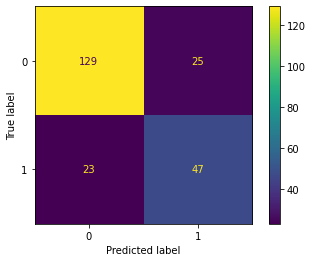

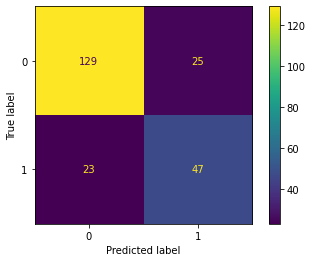

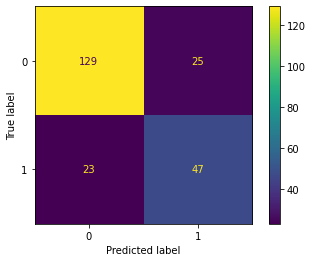

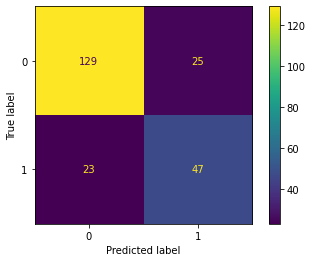

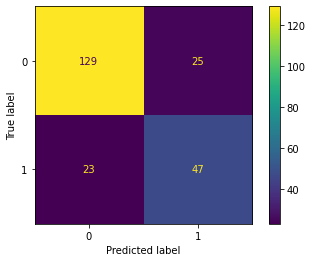

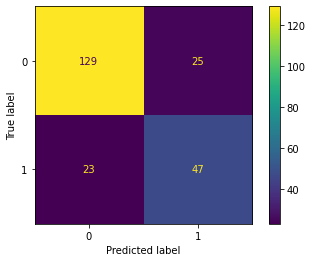

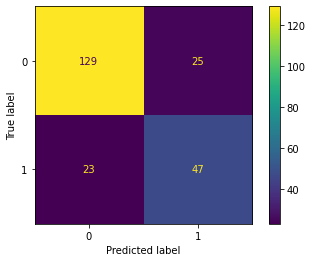

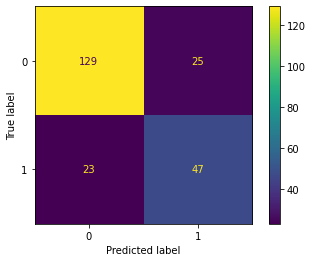

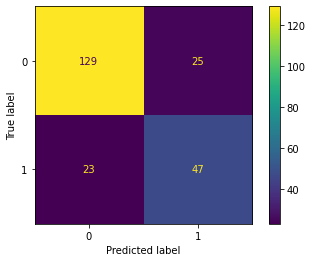

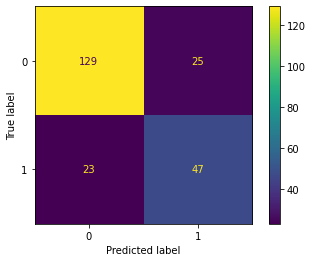

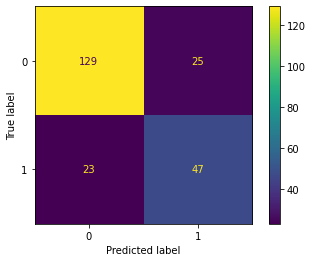

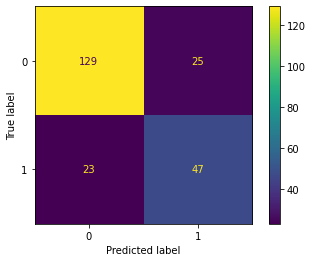

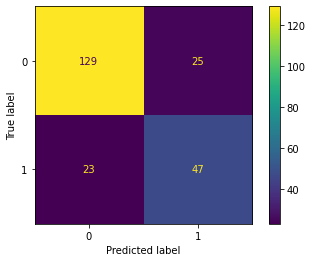

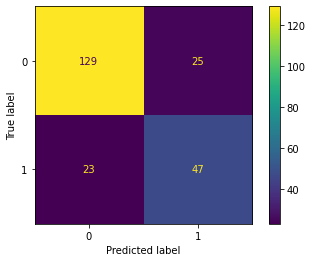

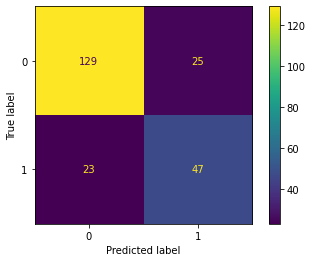

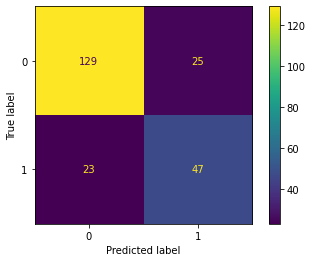

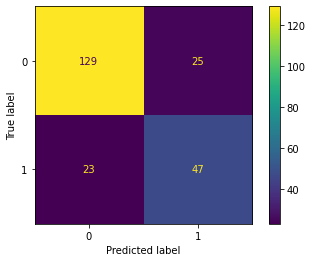

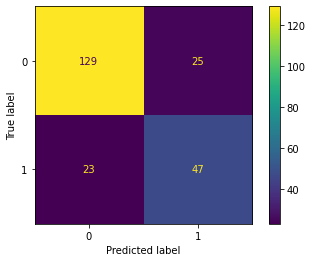

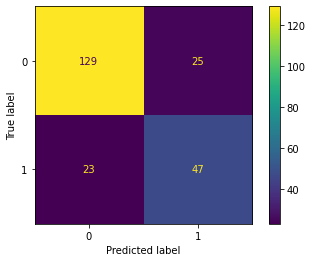

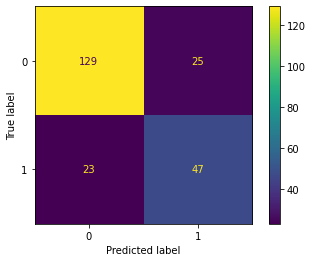

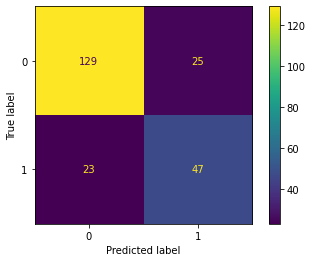

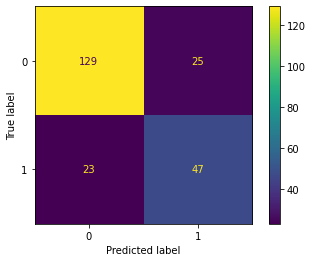

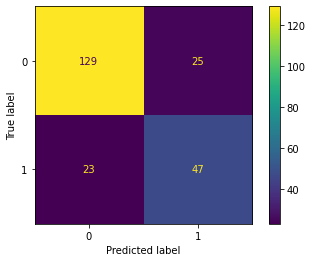

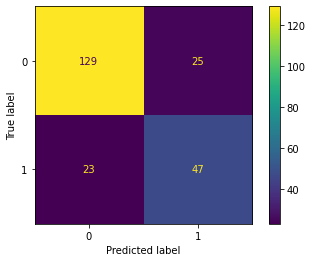

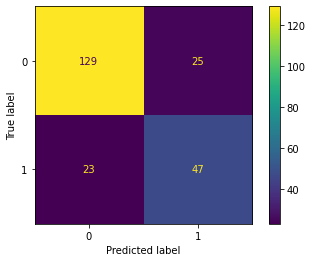

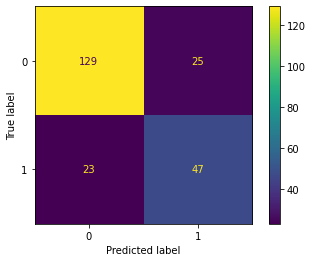

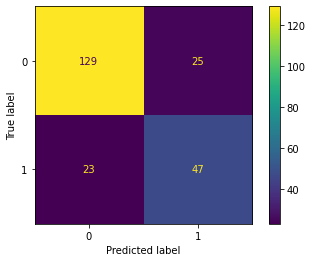

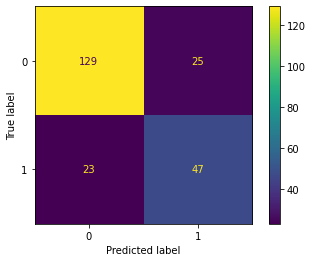

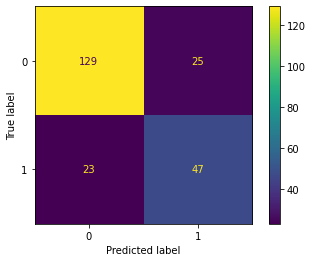

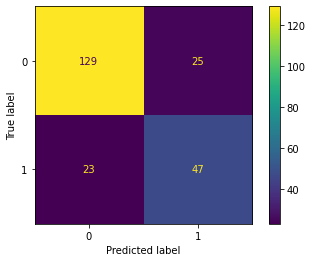

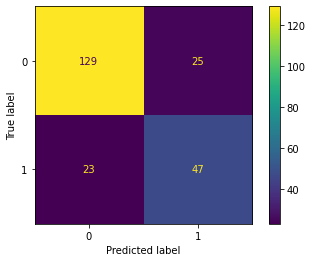

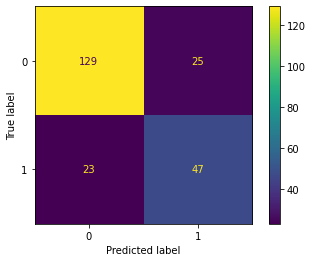

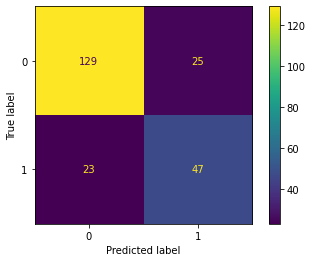

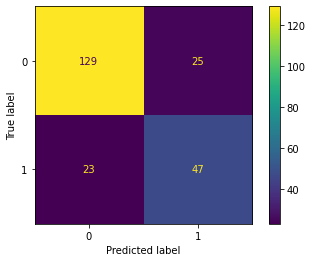

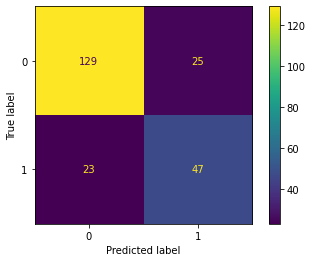

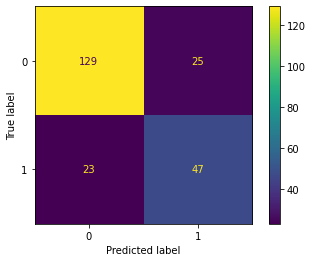

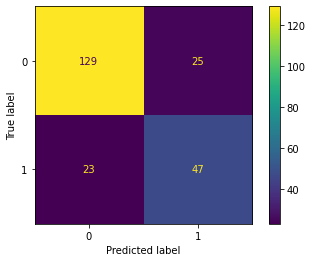

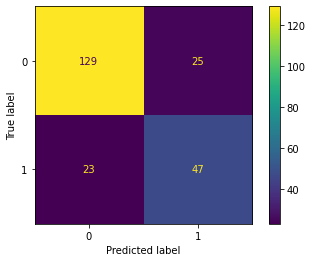

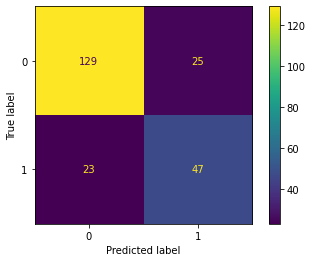

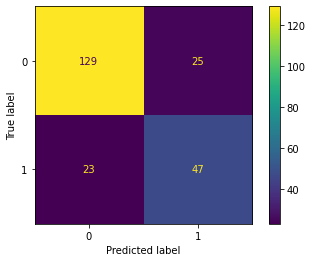

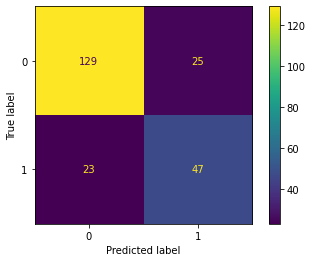

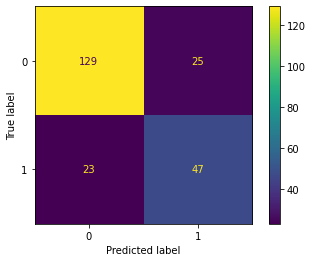

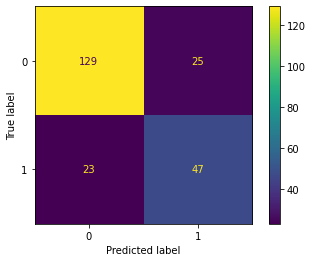

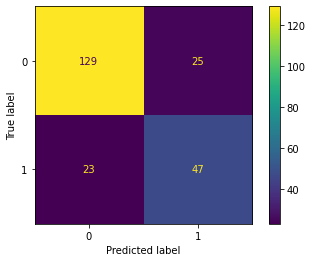

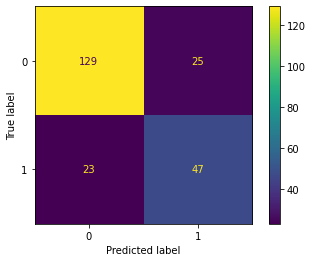

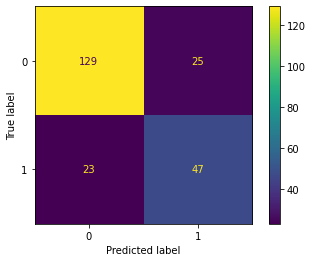

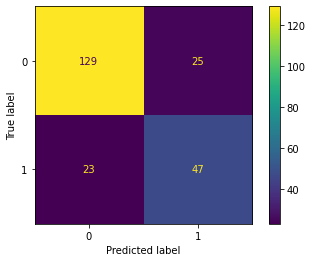

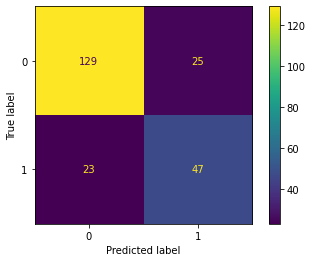

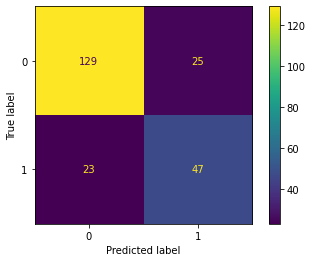

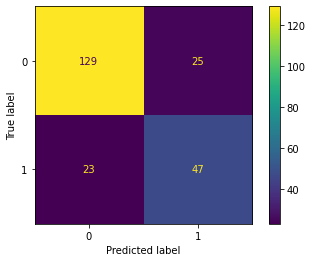

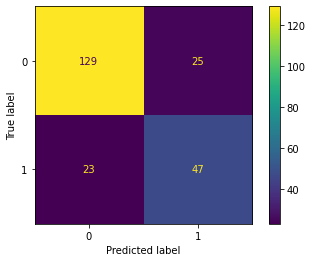

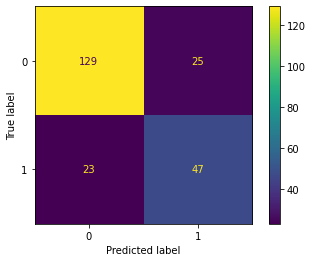

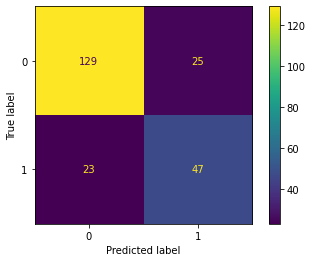

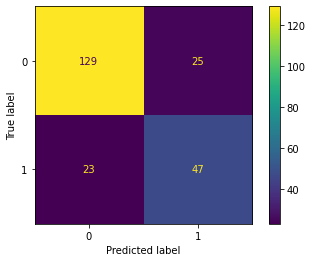

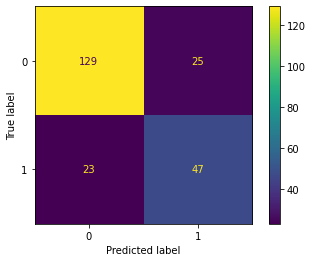

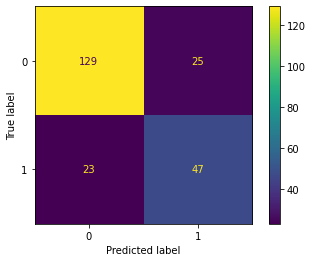

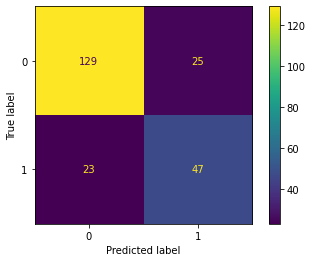

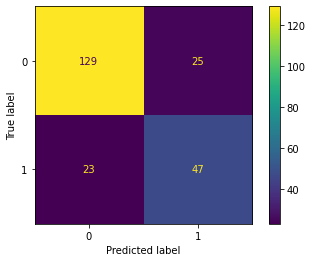

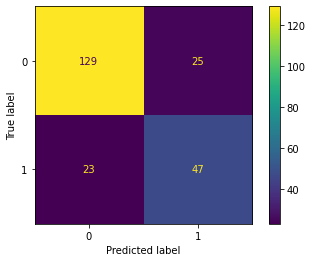

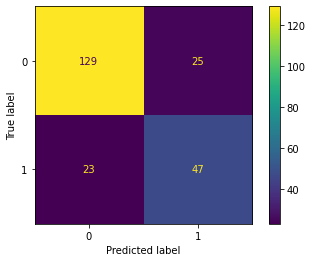

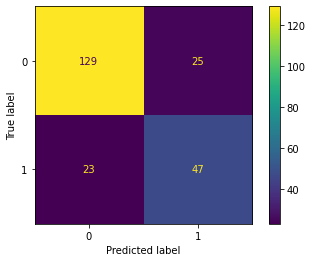

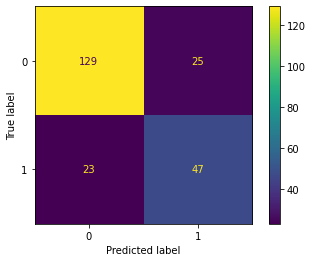

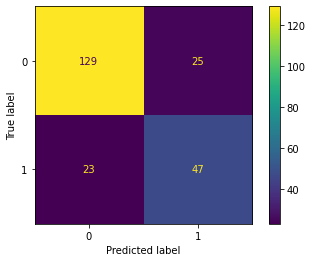

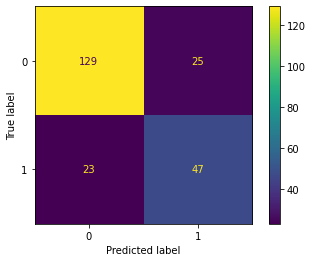

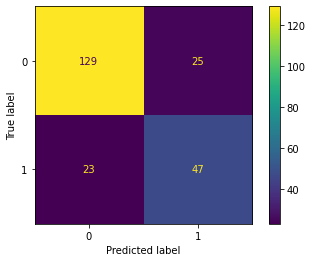

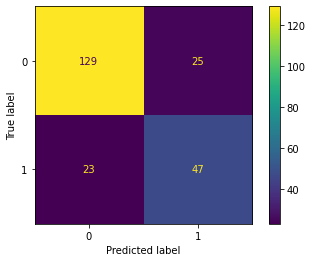

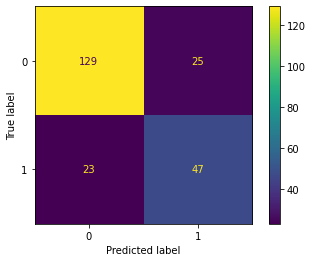

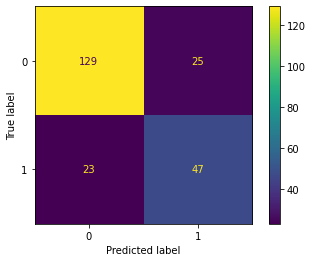

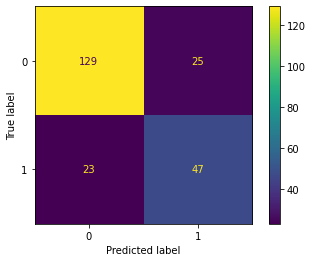

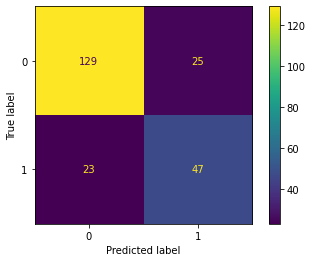

In [79]:
'''
for i in range(10,101):
    #creating object of xgbclassifier class with n_estimators from 10 to 100
    xgb = XGBClassifier(random_state=1,reg_alpha=5,n_estimators=i)
    print("No. of estimators: ",i)
    
    #calling the function and passing the object 
    xgb = create_model(xgb)
'''

Classification report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       154
           1       0.65      0.67      0.66        70

    accuracy                           0.79       224
   macro avg       0.75      0.75      0.75       224
weighted avg       0.79      0.79      0.79       224

Confusion matrix


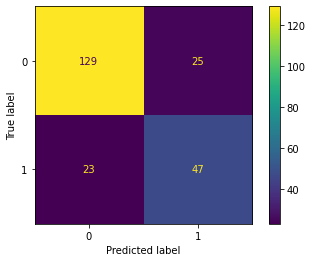

In [80]:
#creating object of xgbclassifier with n_estimators = 15 and reg_alpha = 5
xgb = XGBClassifier(random_state=1,reg_alpha=5,n_estimators=15)
#calling the function and passing the object xgb
xgb = create_model(xgb)

# Support Vector Machine

In [81]:
#performig model with support vector machine 
from sklearn.svm import LinearSVC 
#here LinearSVC mean Linear support vector classifier

In [82]:
#creating object of LinearSVC class
svc = LinearSVC(random_state=1)

Classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224

Confusion matrix


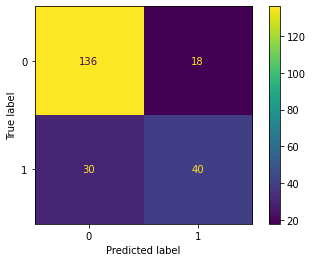

In [83]:
#calling the function and passing the object of svc 
svc = create_model(svc)

Classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224

Confusion matrix


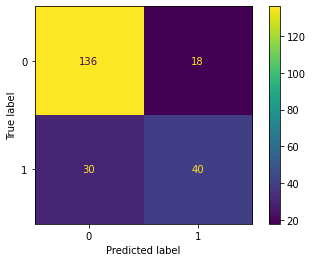

In [85]:
#now again we will perform LinearSVC with Adding External error at training time 
#to find wheather the data is Linear seperable or not 
svc1 = LinearSVC(random_state=1,C=0.10)
#here c is parameter to add error at traning time

#calling the function and passing object of svc1
svc1=create_model(svc1)

In [86]:
'''
Here if we observe accuracy with and without adding external error 
are same.

So we can say that the data is Linear separable
'''

'\nHere if we observe accuracy with and without adding external error \nare same.\n\nSo we can say that the data is Linear separable\n'

In [87]:
'''
Now cross checking with hyperparameter namely:
1. Polynomial kernel
2. Radial basis kernel

This both are for Non-Linear separable data 
'''


'\nNow cross checking with hyperparameter namely:\n1. Polynomial kernel\n2. Radial basis kernel\n\nThis both are for Non-Linear separable data \n'

In [88]:
#svc is used for both polynomial kernel and radial basis kernel
from sklearn.svm import SVC

Classification report
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       154
           1       0.83      0.43      0.57        70

    accuracy                           0.79       224
   macro avg       0.81      0.69      0.72       224
weighted avg       0.80      0.79      0.77       224

Confusion matrix


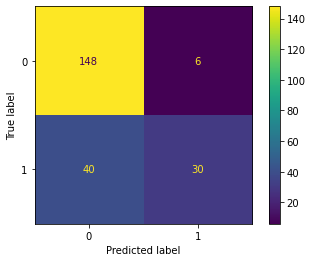

In [89]:
#using Polynomial Kernel 
poly_svc = SVC(random_state=1,kernel='poly')
#calling the function and passing the object of poly_svc
poly_svc = create_model(poly_svc)

Classification report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

Confusion matrix


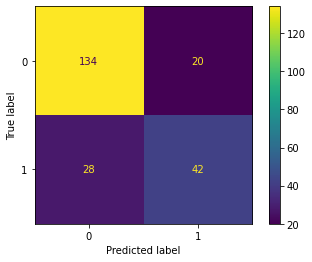

In [90]:
#using Radial basis kernel 
r_svc = SVC(random_state=1,kernel='rbf')
#calling the function and passing the object r_svc
r_svc = create_model(r_svc)

# KNN (K-Nearest Neighbors)

In [91]:
#performing model with KNN 
from sklearn.neighbors import KNeighborsClassifier

In [96]:
#creating object of KNeighborsClassifier class 
knc = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#here p mean euclidean distance

Classification report
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       154
           1       0.62      0.56      0.59        70

    accuracy                           0.75       224
   macro avg       0.71      0.70      0.71       224
weighted avg       0.75      0.75      0.75       224

Confusion matrix


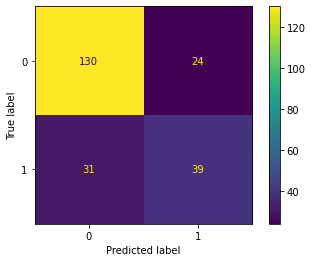

In [98]:
#calling the function and passing the object of knc
knc = create_model(knc)

# Gaussian Naive Bayes

In [99]:
#Gaussian Naviebayes: it is apply only those dataset where all input features are continuous numeric and,
#output is categorical

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
#creating object of GaussianNB class
gnb = GaussianNB()

Classification report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       154
           1       0.62      0.69      0.65        70

    accuracy                           0.77       224
   macro avg       0.73      0.75      0.74       224
weighted avg       0.78      0.77      0.77       224

Confusion matrix


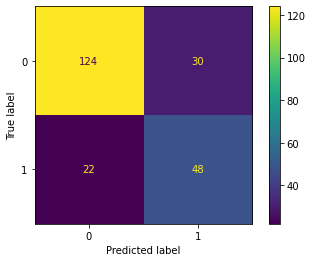

In [103]:
#calling the function and passing the object of gnb
gnb =  create_model(gnb)